# Lab 4:  Regularization

## Sunday, November 3rd 2019

#### David Sondak and Pavlos Protopapas

# Background
Lecture 4 introduced several types of regularization.  In today's lab, you will become more familiar with those regularization techniques and actually apply them to a problem.  The types of regularization that you will explore today are:
* Penalization
* Early stopping
* Dropout

There are many other types of regularization (as mentioned in lecture).  The three regularization techniques that you will explore today are very popular and used frequently in real applications.

We'll begin the story by building a neural network to learn a function from some noisy data.

# Warming Up
Today we'll try to fit the function $$f\left(x\right) = x\sin\left(x\right).$$

Using `keras`, build a fully-connected neural network to fit $f\left(x\right)$.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models
from keras import layers
%matplotlib inline

Using TensorFlow backend.


First, we'll generate some synthetic data with some synthetic noise.

In [2]:
n_samples = 100 # set the number of samples to take for each toy dataset
test_size = 0.2 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x * np.sin(x)

# Generate the truth function (without any noise)
X_true = np.linspace(0.0, 5.0, n_samples)
Y_true = f(X_true)

# Now sample the true function at some points
X = np.random.permutation(X_true) # choose some points from the function - this is our toy dataset 
Y = f(X)

Y = Y + np.random.normal(0.0, 1.0, len(Y)) # Add some noise from a random normal distribution

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Quickly, let's have a look at our training data.

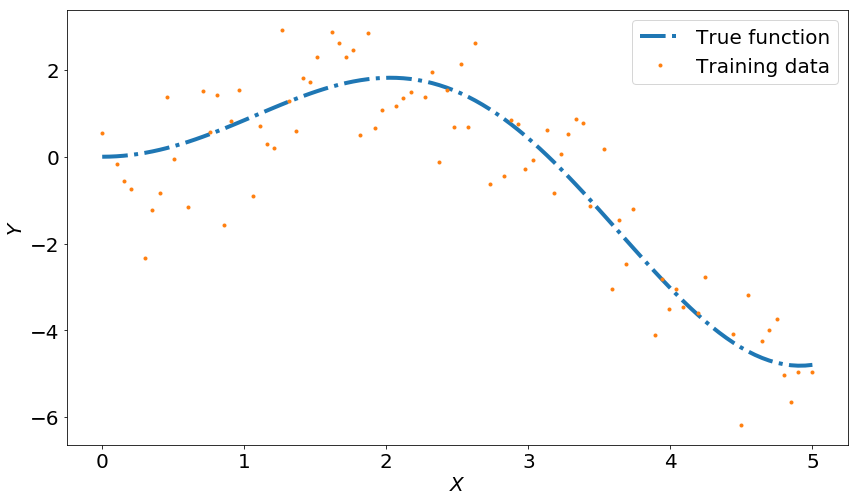

In [3]:
# Plot training data
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Now we'll build a network.  We choose $5$ hidden layers and $100$ nodes per layer.

In [4]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for _ in range(num_layers):
    model.add(layers.Dense(N, activation='tanh'))
    
model.add(layers.Dense(1, activation='linear'))

In [5]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

Next we'll fit the model.  

Notice that we're specifying a *validation set*.  What this means is that `keras` will further split the training set into a training part and a validation part.  The neural network will only be trained on the *training* set.  Meanwhile, `keras` will report performance metrics on the *validation* set so we can get a sense of how well the model has been trained.  We will be using the validation set quite a bit in this lab.

Remember, we don't want to use the test set for anything relating to the training of our models.  By withholding the validation set, we can assess the model performance on the validation set.  Later, we can see how the model performs on data it has never seen before by using in on the test set.

In [6]:
# Fit the model
no_reg = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 5ms/step - loss: 5.3071 - val_loss: 3.8423
Epoch 2/2500
64/64 [==============================] - 0s 51us/step - loss: 5.3810 - val_loss: 3.5331
Epoch 3/2500
64/64 [==============================] - 0s 44us/step - loss: 4.9841 - val_loss: 3.4031
Epoch 4/2500
64/64 [==============================] - 0s 44us/step - loss: 4.6942 - val_loss: 3.5659
Epoch 5/2500
64/64 [==============================] - 0s 65us/step - loss: 4.7473 - val_loss: 3.4598
Epoch 6/2500
64/64 [==============================] - 0s 53us/step - loss: 4.6263 - val_loss: 3.1233
Epoch 7/2500
64/64 [==============================] - 0s 69us/step - loss: 4.3458 - val_loss: 2.8815
Epoch 8/2500
64/64 [==============================] - 0s 52us/step - loss: 4.1986 - val_loss: 2.7939
Epoch 9/2500
64/64 [==============================] - 0s 49us/step - loss: 4.1815 - val_loss: 2.6449
Epoch 10/2500
64/64 [===========================

Epoch 81/2500
64/64 [==============================] - 0s 37us/step - loss: 0.8992 - val_loss: 1.3800
Epoch 82/2500
64/64 [==============================] - 0s 48us/step - loss: 0.8980 - val_loss: 1.3878
Epoch 83/2500
64/64 [==============================] - 0s 47us/step - loss: 0.8965 - val_loss: 1.4700
Epoch 84/2500
64/64 [==============================] - 0s 63us/step - loss: 0.8974 - val_loss: 1.4458
Epoch 85/2500
64/64 [==============================] - 0s 42us/step - loss: 0.8938 - val_loss: 1.3733
Epoch 86/2500
64/64 [==============================] - 0s 47us/step - loss: 0.8962 - val_loss: 1.3912
Epoch 87/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8912 - val_loss: 1.4422
Epoch 88/2500
64/64 [==============================] - 0s 44us/step - loss: 0.8942 - val_loss: 1.3848
Epoch 89/2500
64/64 [==============================] - 0s 51us/step - loss: 0.8889 - val_loss: 1.3326
Epoch 90/2500
64/64 [==============================] - 0s 43us/step - loss: 0.8918

Epoch 161/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8771 - val_loss: 1.2627
Epoch 162/2500
64/64 [==============================] - 0s 46us/step - loss: 0.8771 - val_loss: 1.2613
Epoch 163/2500
64/64 [==============================] - 0s 56us/step - loss: 0.8770 - val_loss: 1.2632
Epoch 164/2500
64/64 [==============================] - 0s 63us/step - loss: 0.8770 - val_loss: 1.2606
Epoch 165/2500
64/64 [==============================] - 0s 42us/step - loss: 0.8770 - val_loss: 1.2620
Epoch 166/2500
64/64 [==============================] - 0s 58us/step - loss: 0.8769 - val_loss: 1.2616
Epoch 167/2500
64/64 [==============================] - 0s 43us/step - loss: 0.8769 - val_loss: 1.2604
Epoch 168/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8768 - val_loss: 1.2622
Epoch 169/2500
64/64 [==============================] - 0s 44us/step - loss: 0.8768 - val_loss: 1.2601
Epoch 170/2500
64/64 [==============================] - 0s 88us/step - lo

Epoch 241/2500
64/64 [==============================] - 0s 55us/step - loss: 0.8989 - val_loss: 1.1454
Epoch 242/2500
64/64 [==============================] - 0s 74us/step - loss: 0.9160 - val_loss: 1.2933
Epoch 243/2500
64/64 [==============================] - 0s 44us/step - loss: 0.8785 - val_loss: 1.3695
Epoch 244/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8923 - val_loss: 1.1817
Epoch 245/2500
64/64 [==============================] - 0s 54us/step - loss: 0.9060 - val_loss: 1.3113
Epoch 246/2500
64/64 [==============================] - 0s 83us/step - loss: 0.8779 - val_loss: 1.3652
Epoch 247/2500
64/64 [==============================] - 0s 43us/step - loss: 0.8875 - val_loss: 1.1968
Epoch 248/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8988 - val_loss: 1.3136
Epoch 249/2500
64/64 [==============================] - 0s 51us/step - loss: 0.8779 - val_loss: 1.3475
Epoch 250/2500
64/64 [==============================] - 0s 45us/step - lo

Epoch 321/2500
64/64 [==============================] - 0s 41us/step - loss: 0.8718 - val_loss: 1.2232
Epoch 322/2500
64/64 [==============================] - 0s 45us/step - loss: 0.8717 - val_loss: 1.2278
Epoch 323/2500
64/64 [==============================] - 0s 48us/step - loss: 0.8717 - val_loss: 1.2252
Epoch 324/2500
64/64 [==============================] - 0s 38us/step - loss: 0.8717 - val_loss: 1.2239
Epoch 325/2500
64/64 [==============================] - 0s 46us/step - loss: 0.8716 - val_loss: 1.2272
Epoch 326/2500
64/64 [==============================] - 0s 47us/step - loss: 0.8716 - val_loss: 1.2228
Epoch 327/2500
64/64 [==============================] - 0s 46us/step - loss: 0.8716 - val_loss: 1.2248
Epoch 328/2500
64/64 [==============================] - 0s 47us/step - loss: 0.8715 - val_loss: 1.2247
Epoch 329/2500
64/64 [==============================] - 0s 44us/step - loss: 0.8715 - val_loss: 1.2217
Epoch 330/2500
64/64 [==============================] - 0s 45us/step - lo

Epoch 401/2500
64/64 [==============================] - 0s 208us/step - loss: 0.8689 - val_loss: 1.2049
Epoch 402/2500
64/64 [==============================] - 0s 70us/step - loss: 0.8689 - val_loss: 1.2046
Epoch 403/2500
64/64 [==============================] - 0s 101us/step - loss: 0.8688 - val_loss: 1.2044
Epoch 404/2500
64/64 [==============================] - 0s 87us/step - loss: 0.8688 - val_loss: 1.2042
Epoch 405/2500
64/64 [==============================] - 0s 75us/step - loss: 0.8688 - val_loss: 1.2039
Epoch 406/2500
64/64 [==============================] - 0s 83us/step - loss: 0.8687 - val_loss: 1.2037
Epoch 407/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8687 - val_loss: 1.2034
Epoch 408/2500
64/64 [==============================] - 0s 106us/step - loss: 0.8687 - val_loss: 1.2032
Epoch 409/2500
64/64 [==============================] - 0s 148us/step - loss: 0.8686 - val_loss: 1.2030
Epoch 410/2500
64/64 [==============================] - 0s 70us/step 

Epoch 481/2500
64/64 [==============================] - 0s 78us/step - loss: 0.8652 - val_loss: 1.1942
Epoch 482/2500
64/64 [==============================] - 0s 79us/step - loss: 0.8651 - val_loss: 1.1817
Epoch 483/2500
64/64 [==============================] - 0s 68us/step - loss: 0.8651 - val_loss: 1.1982
Epoch 484/2500
64/64 [==============================] - 0s 86us/step - loss: 0.8651 - val_loss: 1.1759
Epoch 485/2500
64/64 [==============================] - 0s 160us/step - loss: 0.8652 - val_loss: 1.2062
Epoch 486/2500
64/64 [==============================] - 0s 51us/step - loss: 0.8654 - val_loss: 1.1656
Epoch 487/2500
64/64 [==============================] - 0s 66us/step - loss: 0.8658 - val_loss: 1.2221
Epoch 488/2500
64/64 [==============================] - 0s 57us/step - loss: 0.8666 - val_loss: 1.1475
Epoch 489/2500
64/64 [==============================] - 0s 54us/step - loss: 0.8682 - val_loss: 1.2548
Epoch 490/2500
64/64 [==============================] - 0s 53us/step - l

Epoch 561/2500
64/64 [==============================] - 0s 49us/step - loss: 0.8572 - val_loss: 1.1826
Epoch 562/2500
64/64 [==============================] - 0s 69us/step - loss: 0.8570 - val_loss: 1.1899
Epoch 563/2500
64/64 [==============================] - 0s 49us/step - loss: 0.8569 - val_loss: 1.1782
Epoch 564/2500
64/64 [==============================] - 0s 63us/step - loss: 0.8568 - val_loss: 1.1899
Epoch 565/2500
64/64 [==============================] - 0s 65us/step - loss: 0.8566 - val_loss: 1.1871
Epoch 566/2500
64/64 [==============================] - 0s 74us/step - loss: 0.8564 - val_loss: 1.1819
Epoch 567/2500
64/64 [==============================] - 0s 54us/step - loss: 0.8563 - val_loss: 1.1923
Epoch 568/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8561 - val_loss: 1.1832
Epoch 569/2500
64/64 [==============================] - 0s 69us/step - loss: 0.8559 - val_loss: 1.1854
Epoch 570/2500
64/64 [==============================] - 0s 71us/step - lo

Epoch 641/2500
64/64 [==============================] - 0s 73us/step - loss: 0.8348 - val_loss: 1.1887
Epoch 642/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8343 - val_loss: 1.1889
Epoch 643/2500
64/64 [==============================] - 0s 55us/step - loss: 0.8338 - val_loss: 1.1888
Epoch 644/2500
64/64 [==============================] - 0s 63us/step - loss: 0.8333 - val_loss: 1.1890
Epoch 645/2500
64/64 [==============================] - 0s 70us/step - loss: 0.8329 - val_loss: 1.1892
Epoch 646/2500
64/64 [==============================] - 0s 80us/step - loss: 0.8324 - val_loss: 1.1891
Epoch 647/2500
64/64 [==============================] - 0s 58us/step - loss: 0.8319 - val_loss: 1.1893
Epoch 648/2500
64/64 [==============================] - 0s 106us/step - loss: 0.8314 - val_loss: 1.1894
Epoch 649/2500
64/64 [==============================] - 0s 47us/step - loss: 0.8308 - val_loss: 1.1894
Epoch 650/2500
64/64 [==============================] - 0s 69us/step - l

Epoch 721/2500
64/64 [==============================] - 0s 57us/step - loss: 0.8014 - val_loss: 1.2176
Epoch 722/2500
64/64 [==============================] - 0s 62us/step - loss: 0.8012 - val_loss: 1.2179
Epoch 723/2500
64/64 [==============================] - 0s 61us/step - loss: 0.8010 - val_loss: 1.2182
Epoch 724/2500
64/64 [==============================] - 0s 53us/step - loss: 0.8009 - val_loss: 1.2185
Epoch 725/2500
64/64 [==============================] - 0s 56us/step - loss: 0.8007 - val_loss: 1.2188
Epoch 726/2500
64/64 [==============================] - 0s 68us/step - loss: 0.8006 - val_loss: 1.2190
Epoch 727/2500
64/64 [==============================] - 0s 67us/step - loss: 0.8004 - val_loss: 1.2192
Epoch 728/2500
64/64 [==============================] - 0s 51us/step - loss: 0.8003 - val_loss: 1.2195
Epoch 729/2500
64/64 [==============================] - 0s 56us/step - loss: 0.8001 - val_loss: 1.2197
Epoch 730/2500
64/64 [==============================] - 0s 67us/step - lo

Epoch 801/2500
64/64 [==============================] - 0s 85us/step - loss: 0.7863 - val_loss: 1.2317
Epoch 802/2500
64/64 [==============================] - 0s 114us/step - loss: 0.7860 - val_loss: 1.2317
Epoch 803/2500
64/64 [==============================] - 0s 70us/step - loss: 0.7856 - val_loss: 1.2317
Epoch 804/2500
64/64 [==============================] - 0s 58us/step - loss: 0.7853 - val_loss: 1.2318
Epoch 805/2500
64/64 [==============================] - 0s 68us/step - loss: 0.7850 - val_loss: 1.2318
Epoch 806/2500
64/64 [==============================] - 0s 65us/step - loss: 0.7847 - val_loss: 1.2318
Epoch 807/2500
64/64 [==============================] - 0s 84us/step - loss: 0.7843 - val_loss: 1.2318
Epoch 808/2500
64/64 [==============================] - 0s 62us/step - loss: 0.7840 - val_loss: 1.2318
Epoch 809/2500
64/64 [==============================] - 0s 78us/step - loss: 0.7837 - val_loss: 1.2317
Epoch 810/2500
64/64 [==============================] - 0s 69us/step - l

Epoch 881/2500
64/64 [==============================] - 0s 50us/step - loss: 0.7430 - val_loss: 1.2254
Epoch 882/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7423 - val_loss: 1.2255
Epoch 883/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7416 - val_loss: 1.2257
Epoch 884/2500
64/64 [==============================] - 0s 56us/step - loss: 0.7409 - val_loss: 1.2259
Epoch 885/2500
64/64 [==============================] - 0s 65us/step - loss: 0.7402 - val_loss: 1.2261
Epoch 886/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7396 - val_loss: 1.2263
Epoch 887/2500
64/64 [==============================] - 0s 63us/step - loss: 0.7389 - val_loss: 1.2264
Epoch 888/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7382 - val_loss: 1.2266
Epoch 889/2500
64/64 [==============================] - 0s 66us/step - loss: 0.7376 - val_loss: 1.2268
Epoch 890/2500
64/64 [==============================] - 0s 54us/step - lo

Epoch 961/2500
64/64 [==============================] - 0s 60us/step - loss: 0.7128 - val_loss: 1.2070
Epoch 962/2500
64/64 [==============================] - 0s 59us/step - loss: 0.7126 - val_loss: 1.2052
Epoch 963/2500
64/64 [==============================] - 0s 55us/step - loss: 0.7125 - val_loss: 1.2057
Epoch 964/2500
64/64 [==============================] - 0s 70us/step - loss: 0.7123 - val_loss: 1.2027
Epoch 965/2500
64/64 [==============================] - 0s 61us/step - loss: 0.7121 - val_loss: 1.2051
Epoch 966/2500
64/64 [==============================] - 0s 66us/step - loss: 0.7120 - val_loss: 1.1992
Epoch 967/2500
64/64 [==============================] - 0s 76us/step - loss: 0.7118 - val_loss: 1.2063
Epoch 968/2500
64/64 [==============================] - 0s 68us/step - loss: 0.7116 - val_loss: 1.1927
Epoch 969/2500
64/64 [==============================] - 0s 64us/step - loss: 0.7115 - val_loss: 1.2122
Epoch 970/2500
64/64 [==============================] - 0s 67us/step - lo

64/64 [==============================] - 0s 77us/step - loss: 0.7015 - val_loss: 1.1914
Epoch 1041/2500
64/64 [==============================] - 0s 73us/step - loss: 0.7014 - val_loss: 1.1543
Epoch 1042/2500
64/64 [==============================] - 0s 66us/step - loss: 0.7011 - val_loss: 1.1596
Epoch 1043/2500
64/64 [==============================] - 0s 86us/step - loss: 0.7009 - val_loss: 1.1881
Epoch 1044/2500
64/64 [==============================] - 0s 80us/step - loss: 0.7008 - val_loss: 1.1512
Epoch 1045/2500
64/64 [==============================] - 0s 65us/step - loss: 0.7006 - val_loss: 1.1696
Epoch 1046/2500
64/64 [==============================] - 0s 72us/step - loss: 0.7003 - val_loss: 1.1782
Epoch 1047/2500
64/64 [==============================] - 0s 82us/step - loss: 0.7002 - val_loss: 1.1479
Epoch 1048/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7001 - val_loss: 1.1731
Epoch 1049/2500
64/64 [==============================] - 0s 58us/step - loss: 0.

Epoch 1119/2500
64/64 [==============================] - 0s 51us/step - loss: 0.6838 - val_loss: 1.1087
Epoch 1120/2500
64/64 [==============================] - 0s 63us/step - loss: 0.6835 - val_loss: 1.1088
Epoch 1121/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6832 - val_loss: 1.1070
Epoch 1122/2500
64/64 [==============================] - 0s 95us/step - loss: 0.6829 - val_loss: 1.1070
Epoch 1123/2500
64/64 [==============================] - 0s 55us/step - loss: 0.6826 - val_loss: 1.1057
Epoch 1124/2500
64/64 [==============================] - 0s 61us/step - loss: 0.6822 - val_loss: 1.1050
Epoch 1125/2500
64/64 [==============================] - 0s 48us/step - loss: 0.6819 - val_loss: 1.1045
Epoch 1126/2500
64/64 [==============================] - 0s 64us/step - loss: 0.6816 - val_loss: 1.1032
Epoch 1127/2500
64/64 [==============================] - 0s 65us/step - loss: 0.6813 - val_loss: 1.1030
Epoch 1128/2500
64/64 [==============================] - 0s 69us

Epoch 1198/2500
64/64 [==============================] - 0s 61us/step - loss: 0.6833 - val_loss: 0.9766
Epoch 1199/2500
64/64 [==============================] - 0s 56us/step - loss: 0.6649 - val_loss: 1.3883
Epoch 1200/2500
64/64 [==============================] - 0s 45us/step - loss: 0.7265 - val_loss: 0.8317
Epoch 1201/2500
64/64 [==============================] - 0s 62us/step - loss: 0.7357 - val_loss: 1.2581
Epoch 1202/2500
64/64 [==============================] - 0s 76us/step - loss: 0.6706 - val_loss: 1.2610
Epoch 1203/2500
64/64 [==============================] - 0s 95us/step - loss: 0.6755 - val_loss: 0.8414
Epoch 1204/2500
64/64 [==============================] - 0s 88us/step - loss: 0.7070 - val_loss: 1.2495
Epoch 1205/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6771 - val_loss: 1.0977
Epoch 1206/2500
64/64 [==============================] - 0s 59us/step - loss: 0.6574 - val_loss: 0.9565
Epoch 1207/2500
64/64 [==============================] - 0s 61us

Epoch 1277/2500
64/64 [==============================] - 0s 116us/step - loss: 0.6389 - val_loss: 1.1515
Epoch 1278/2500
64/64 [==============================] - 0s 91us/step - loss: 0.6305 - val_loss: 0.9871
Epoch 1279/2500
64/64 [==============================] - 0s 82us/step - loss: 0.6212 - val_loss: 1.0656
Epoch 1280/2500
64/64 [==============================] - 0s 91us/step - loss: 0.6166 - val_loss: 1.0845
Epoch 1281/2500
64/64 [==============================] - 0s 83us/step - loss: 0.6169 - val_loss: 0.9910
Epoch 1282/2500
64/64 [==============================] - 0s 59us/step - loss: 0.6200 - val_loss: 1.1399
Epoch 1283/2500
64/64 [==============================] - 0s 110us/step - loss: 0.6242 - val_loss: 0.9590
Epoch 1284/2500
64/64 [==============================] - 0s 89us/step - loss: 0.6254 - val_loss: 1.1612
Epoch 1285/2500
64/64 [==============================] - 0s 83us/step - loss: 0.6271 - val_loss: 0.9601
Epoch 1286/2500
64/64 [==============================] - 0s 61

Epoch 1356/2500
64/64 [==============================] - 0s 73us/step - loss: 1.0039 - val_loss: 0.7020
Epoch 1357/2500
64/64 [==============================] - 0s 91us/step - loss: 0.6805 - val_loss: 1.8036
Epoch 1358/2500
64/64 [==============================] - 0s 59us/step - loss: 0.8438 - val_loss: 1.8740
Epoch 1359/2500
64/64 [==============================] - 0s 145us/step - loss: 0.8304 - val_loss: 0.9403
Epoch 1360/2500
64/64 [==============================] - 0s 58us/step - loss: 0.6736 - val_loss: 0.7966
Epoch 1361/2500
64/64 [==============================] - 0s 85us/step - loss: 0.9486 - val_loss: 1.1602
Epoch 1362/2500
64/64 [==============================] - 0s 78us/step - loss: 0.6720 - val_loss: 1.8935
Epoch 1363/2500
64/64 [==============================] - 0s 56us/step - loss: 0.9881 - val_loss: 1.7167
Epoch 1364/2500
64/64 [==============================] - 0s 100us/step - loss: 0.9214 - val_loss: 1.0059
Epoch 1365/2500
64/64 [==============================] - 0s 65

Epoch 1435/2500
64/64 [==============================] - 0s 78us/step - loss: 0.5764 - val_loss: 1.0359
Epoch 1436/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5762 - val_loss: 1.0455
Epoch 1437/2500
64/64 [==============================] - 0s 60us/step - loss: 0.5758 - val_loss: 1.0706
Epoch 1438/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5760 - val_loss: 1.0533
Epoch 1439/2500
64/64 [==============================] - 0s 51us/step - loss: 0.5754 - val_loss: 1.0383
Epoch 1440/2500
64/64 [==============================] - 0s 68us/step - loss: 0.5756 - val_loss: 1.0592
Epoch 1441/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5751 - val_loss: 1.0626
Epoch 1442/2500
64/64 [==============================] - 0s 59us/step - loss: 0.5751 - val_loss: 1.0407
Epoch 1443/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5749 - val_loss: 1.0458
Epoch 1444/2500
64/64 [==============================] - 0s 52us

Epoch 1514/2500
64/64 [==============================] - 0s 71us/step - loss: 0.5642 - val_loss: 1.0644
Epoch 1515/2500
64/64 [==============================] - 0s 67us/step - loss: 0.5640 - val_loss: 1.0642
Epoch 1516/2500
64/64 [==============================] - 0s 48us/step - loss: 0.5638 - val_loss: 1.0647
Epoch 1517/2500
64/64 [==============================] - 0s 52us/step - loss: 0.5637 - val_loss: 1.0650
Epoch 1518/2500
64/64 [==============================] - 0s 52us/step - loss: 0.5635 - val_loss: 1.0648
Epoch 1519/2500
64/64 [==============================] - 0s 56us/step - loss: 0.5633 - val_loss: 1.0652
Epoch 1520/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5632 - val_loss: 1.0656
Epoch 1521/2500
64/64 [==============================] - 0s 57us/step - loss: 0.5630 - val_loss: 1.0654
Epoch 1522/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5628 - val_loss: 1.0657
Epoch 1523/2500
64/64 [==============================] - 0s 43us

Epoch 1593/2500
64/64 [==============================] - 0s 49us/step - loss: 0.5495 - val_loss: 1.0718
Epoch 1594/2500
64/64 [==============================] - 0s 60us/step - loss: 0.5493 - val_loss: 1.0719
Epoch 1595/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5491 - val_loss: 1.0719
Epoch 1596/2500
64/64 [==============================] - 0s 55us/step - loss: 0.5489 - val_loss: 1.0720
Epoch 1597/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5487 - val_loss: 1.0720
Epoch 1598/2500
64/64 [==============================] - 0s 81us/step - loss: 0.5485 - val_loss: 1.0721
Epoch 1599/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5482 - val_loss: 1.0721
Epoch 1600/2500
64/64 [==============================] - 0s 67us/step - loss: 0.5480 - val_loss: 1.0722
Epoch 1601/2500
64/64 [==============================] - 0s 60us/step - loss: 0.5478 - val_loss: 1.0723
Epoch 1602/2500
64/64 [==============================] - 0s 43us

Epoch 1672/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5311 - val_loss: 1.0797
Epoch 1673/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5309 - val_loss: 1.0798
Epoch 1674/2500
64/64 [==============================] - 0s 69us/step - loss: 0.5306 - val_loss: 1.0800
Epoch 1675/2500
64/64 [==============================] - 0s 63us/step - loss: 0.5304 - val_loss: 1.0801
Epoch 1676/2500
64/64 [==============================] - 0s 56us/step - loss: 0.5301 - val_loss: 1.0803
Epoch 1677/2500
64/64 [==============================] - 0s 69us/step - loss: 0.5299 - val_loss: 1.0804
Epoch 1678/2500
64/64 [==============================] - 0s 52us/step - loss: 0.5296 - val_loss: 1.0806
Epoch 1679/2500
64/64 [==============================] - 0s 80us/step - loss: 0.5293 - val_loss: 1.0808
Epoch 1680/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5291 - val_loss: 1.0810
Epoch 1681/2500
64/64 [==============================] - 0s 56us

Epoch 1751/2500
64/64 [==============================] - 0s 73us/step - loss: 0.5561 - val_loss: 0.9278
Epoch 1752/2500
64/64 [==============================] - 0s 56us/step - loss: 0.5540 - val_loss: 0.9850
Epoch 1753/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5511 - val_loss: 1.0451
Epoch 1754/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5523 - val_loss: 0.9366
Epoch 1755/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5521 - val_loss: 1.0123
Epoch 1756/2500
64/64 [==============================] - 0s 55us/step - loss: 0.5481 - val_loss: 1.0228
Epoch 1757/2500
64/64 [==============================] - 0s 76us/step - loss: 0.5478 - val_loss: 0.9339
Epoch 1758/2500
64/64 [==============================] - 0s 67us/step - loss: 0.5489 - val_loss: 1.0469
Epoch 1759/2500
64/64 [==============================] - 0s 65us/step - loss: 0.5462 - val_loss: 0.9984
Epoch 1760/2500
64/64 [==============================] - 0s 55us

Epoch 1830/2500
64/64 [==============================] - 0s 98us/step - loss: 0.5272 - val_loss: 1.2438
Epoch 1831/2500
64/64 [==============================] - 0s 44us/step - loss: 0.5642 - val_loss: 0.6824
Epoch 1832/2500
64/64 [==============================] - 0s 70us/step - loss: 0.7551 - val_loss: 0.8126
Epoch 1833/2500
64/64 [==============================] - 0s 72us/step - loss: 0.6184 - val_loss: 1.7592
Epoch 1834/2500
64/64 [==============================] - 0s 45us/step - loss: 0.9223 - val_loss: 1.4741
Epoch 1835/2500
64/64 [==============================] - 0s 56us/step - loss: 0.7679 - val_loss: 0.6494
Epoch 1836/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8969 - val_loss: 0.6734
Epoch 1837/2500
64/64 [==============================] - 0s 49us/step - loss: 0.8042 - val_loss: 1.3276
Epoch 1838/2500
64/64 [==============================] - 0s 50us/step - loss: 0.6554 - val_loss: 1.6451
Epoch 1839/2500
64/64 [==============================] - 0s 74us

Epoch 1909/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5208 - val_loss: 1.0554
Epoch 1910/2500
64/64 [==============================] - 0s 47us/step - loss: 0.5206 - val_loss: 0.9251
Epoch 1911/2500
64/64 [==============================] - 0s 51us/step - loss: 0.5198 - val_loss: 1.0301
Epoch 1912/2500
64/64 [==============================] - 0s 82us/step - loss: 0.5188 - val_loss: 0.9702
Epoch 1913/2500
64/64 [==============================] - 0s 51us/step - loss: 0.5179 - val_loss: 0.9648
Epoch 1914/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5174 - val_loss: 1.0262
Epoch 1915/2500
64/64 [==============================] - 0s 85us/step - loss: 0.5172 - val_loss: 0.9457
Epoch 1916/2500
64/64 [==============================] - 0s 66us/step - loss: 0.5168 - val_loss: 1.0302
Epoch 1917/2500
64/64 [==============================] - 0s 82us/step - loss: 0.5162 - val_loss: 0.9936
Epoch 1918/2500
64/64 [==============================] - 0s 80us

Epoch 1988/2500
64/64 [==============================] - 0s 65us/step - loss: 0.7613 - val_loss: 1.2926
Epoch 1989/2500
64/64 [==============================] - 0s 63us/step - loss: 0.6574 - val_loss: 0.9198
Epoch 1990/2500
64/64 [==============================] - 0s 73us/step - loss: 0.7065 - val_loss: 0.8530
Epoch 1991/2500
64/64 [==============================] - 0s 65us/step - loss: 0.6887 - val_loss: 1.1396
Epoch 1992/2500
64/64 [==============================] - 0s 53us/step - loss: 0.6283 - val_loss: 1.4583
Epoch 1993/2500
64/64 [==============================] - 0s 68us/step - loss: 0.7436 - val_loss: 1.0525
Epoch 1994/2500
64/64 [==============================] - 0s 71us/step - loss: 0.6210 - val_loss: 0.7824
Epoch 1995/2500
64/64 [==============================] - 0s 65us/step - loss: 0.6070 - val_loss: 0.7814
Epoch 1996/2500
64/64 [==============================] - 0s 56us/step - loss: 0.6189 - val_loss: 0.9625
Epoch 1997/2500
64/64 [==============================] - 0s 58us

Epoch 2067/2500
64/64 [==============================] - 0s 44us/step - loss: 0.5073 - val_loss: 1.1360
Epoch 2068/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5084 - val_loss: 1.0941
Epoch 2069/2500
64/64 [==============================] - 0s 70us/step - loss: 0.5059 - val_loss: 1.0976
Epoch 2070/2500
64/64 [==============================] - 0s 59us/step - loss: 0.5055 - val_loss: 1.1367
Epoch 2071/2500
64/64 [==============================] - 0s 50us/step - loss: 0.5065 - val_loss: 1.0909
Epoch 2072/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5048 - val_loss: 1.0947
Epoch 2073/2500
64/64 [==============================] - 0s 51us/step - loss: 0.5032 - val_loss: 1.1287
Epoch 2074/2500
64/64 [==============================] - 0s 53us/step - loss: 0.5077 - val_loss: 1.0621
Epoch 2075/2500
64/64 [==============================] - 0s 55us/step - loss: 0.5082 - val_loss: 1.0909
Epoch 2076/2500
64/64 [==============================] - 0s 47us

Epoch 2146/2500
64/64 [==============================] - 0s 74us/step - loss: 0.4782 - val_loss: 1.0870
Epoch 2147/2500
64/64 [==============================] - 0s 63us/step - loss: 0.4780 - val_loss: 1.0859
Epoch 2148/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4778 - val_loss: 1.0853
Epoch 2149/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4776 - val_loss: 1.0875
Epoch 2150/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4774 - val_loss: 1.0879
Epoch 2151/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4773 - val_loss: 1.0875
Epoch 2152/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4771 - val_loss: 1.0895
Epoch 2153/2500
64/64 [==============================] - 0s 89us/step - loss: 0.4769 - val_loss: 1.0901
Epoch 2154/2500
64/64 [==============================] - 0s 50us/step - loss: 0.4767 - val_loss: 1.0892
Epoch 2155/2500
64/64 [==============================] - 0s 94us

Epoch 2225/2500
64/64 [==============================] - 0s 49us/step - loss: 0.4657 - val_loss: 1.1357
Epoch 2226/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4656 - val_loss: 1.1361
Epoch 2227/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4655 - val_loss: 1.1366
Epoch 2228/2500
64/64 [==============================] - 0s 52us/step - loss: 0.4653 - val_loss: 1.1371
Epoch 2229/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4652 - val_loss: 1.1375
Epoch 2230/2500
64/64 [==============================] - 0s 55us/step - loss: 0.4651 - val_loss: 1.1380
Epoch 2231/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4649 - val_loss: 1.1385
Epoch 2232/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4648 - val_loss: 1.1389
Epoch 2233/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4647 - val_loss: 1.1393
Epoch 2234/2500
64/64 [==============================] - 0s 45us

Epoch 2304/2500
64/64 [==============================] - 0s 59us/step - loss: 0.4552 - val_loss: 1.1616
Epoch 2305/2500
64/64 [==============================] - 0s 71us/step - loss: 0.4551 - val_loss: 1.1618
Epoch 2306/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4549 - val_loss: 1.1620
Epoch 2307/2500
64/64 [==============================] - 0s 136us/step - loss: 0.4548 - val_loss: 1.1623
Epoch 2308/2500
64/64 [==============================] - 0s 56us/step - loss: 0.4547 - val_loss: 1.1625
Epoch 2309/2500
64/64 [==============================] - 0s 90us/step - loss: 0.4545 - val_loss: 1.1627
Epoch 2310/2500
64/64 [==============================] - 0s 78us/step - loss: 0.4544 - val_loss: 1.1629
Epoch 2311/2500
64/64 [==============================] - 0s 59us/step - loss: 0.4543 - val_loss: 1.1632
Epoch 2312/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4541 - val_loss: 1.1634
Epoch 2313/2500
64/64 [==============================] - 0s 65u

Epoch 2383/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4438 - val_loss: 1.1811
Epoch 2384/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4437 - val_loss: 1.1814
Epoch 2385/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4435 - val_loss: 1.1816
Epoch 2386/2500
64/64 [==============================] - 0s 69us/step - loss: 0.4434 - val_loss: 1.1820
Epoch 2387/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4432 - val_loss: 1.1822
Epoch 2388/2500
64/64 [==============================] - 0s 76us/step - loss: 0.4430 - val_loss: 1.1826
Epoch 2389/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4429 - val_loss: 1.1828
Epoch 2390/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4427 - val_loss: 1.1832
Epoch 2391/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4426 - val_loss: 1.1834
Epoch 2392/2500
64/64 [==============================] - 0s 60us

Epoch 2462/2500
64/64 [==============================] - 0s 53us/step - loss: 0.8576 - val_loss: 1.4651
Epoch 2463/2500
64/64 [==============================] - 0s 44us/step - loss: 0.7220 - val_loss: 1.4439
Epoch 2464/2500
64/64 [==============================] - 0s 55us/step - loss: 0.7111 - val_loss: 1.3996
Epoch 2465/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7279 - val_loss: 1.0792
Epoch 2466/2500
64/64 [==============================] - 0s 81us/step - loss: 0.6969 - val_loss: 0.9308
Epoch 2467/2500
64/64 [==============================] - 0s 55us/step - loss: 0.7184 - val_loss: 0.8599
Epoch 2468/2500
64/64 [==============================] - 0s 73us/step - loss: 0.6668 - val_loss: 0.8444
Epoch 2469/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6363 - val_loss: 0.8810
Epoch 2470/2500
64/64 [==============================] - 0s 67us/step - loss: 0.6435 - val_loss: 0.8698
Epoch 2471/2500
64/64 [==============================] - 0s 64us

Now the model is trained.

Let's see what the solution looks like.

We will also get the validation data set that `keras` created for us.  By plotting the validation data, we will gain some insight into how well the model generalizes.

In [7]:
# Validation set
X_val = no_reg.validation_data[0]
Y_val = no_reg.validation_data[1]

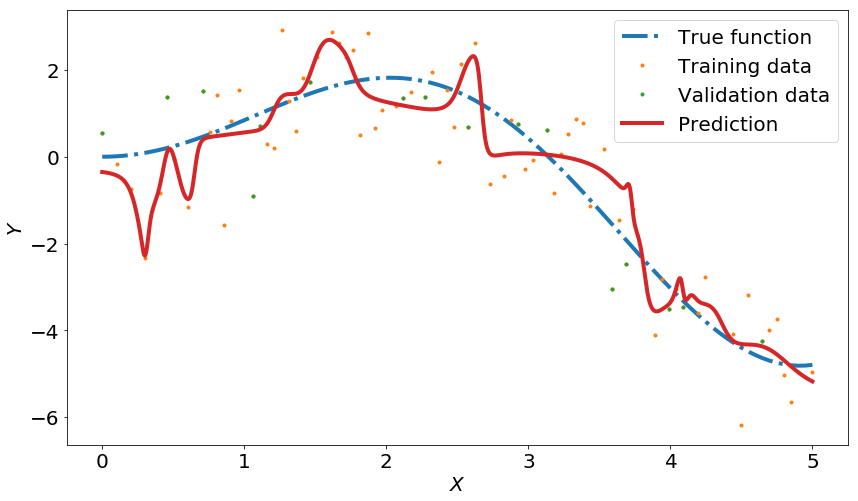

In [8]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred = model.predict(X_range)

# Now plot everything
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_val, Y_val, '.', label='Validation data')
ax.plot(X_range, y_pred, lw=4, label='Prediction')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

The prediction looks pretty bad.  The neural network model is trying to go through all the training points.  This is a classic case of overfitting.  The solution has a lot of oscillations and it rarely fits the validation data.  It may be a good idea to use some kind of regularization.

Let's begin with some penalization methods.

# Penalization
As mentioned in lecture, the loss function can be augmented by an additional term called the penalization term.  Mathematically, the goal is to find the set of weights $W$ that minimize the functional $$J_{R}\left(W; X, y\right) = J\left(W; X, y\right) + \alpha\Omega\left(W\right)$$
where $\alpha$ is called the regularization (or penalization) parameter.  In this lab, $\displaystyle J\left(W; X, y\right)$ is the MSE loss function.

Next, we consider the effect of two different forms for the penalization term: $L_{1}$ and $L_{2}$ penalization.  For reference, 
$$\Omega_{L_{1}} = \frac{1}{2}\left\|W\right\|_{1}$$
and 
$$\Omega_{L_{2}} = \frac{1}{2}\|W\|^{2}_{2}.$$

Note that the biases are not being penalized.

## Exercise
Fit the same network as above ($5$ hidden layers, $100$ nodes per layer, linear output layer), but this time use $L_{2}$ and $L_{1}$ regularization.

**Deliverables:**
* Make two figures, one on top of the other.
* The first figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{2}$ regularization
* The second figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{1}$ regularization
* **Make sure everything is clearly labeled!**
* Discuss the results.

**Hints:**
* Use `kernel_regularizer=regularizers.l2(alpha)` after the `activation` argument in each of your layers.
* Choose a value for `alpha` that you think works well.  You may need to play around with this a little bit.
* See the `Keras` documentation on regularization:  [Usage of regularizers](https://keras.io/regularizers/)
* Here's some pseudo-code:

```python
from keras import regularizers

num_layers = 5
N = 100
alpha = 

input_dim = 1

### Create network
model_L2 = 
model_L2.add()


### Compile network
model_L2.compile()

### Fit model
L2_reg = model_L2.fit()

### Extract validation data
X_val_L2 = 
Y_val_L2 = 

### REPEAT FOR L1
###
###
###

# PLOT
fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot() # Top plots
### ...

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].legend(loc=1, fontsize=20)


ax[1].plot() # Bottom plots
### ...
ax[1].set_xlabel(r'$Y$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].legend(loc=1, fontsize=20)

plt.show()
```

### Solution

In [9]:
from keras import regularizers

num_layers = 5
N = 100
alpha = 0.005

input_dim = 1

model_L2 = models.Sequential()

model_L2.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l2(alpha)))

for h in range(num_layers):
    model_L2.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l2(alpha)))
    
model_L2.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(alpha)))

model_L2.compile(loss='mean_squared_error', optimizer='adam')

L2_reg = model_L2.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

# Validation set
X_val_L2 = L2_reg.validation_data[0]
Y_val_L2 = L2_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 6ms/step - loss: 8.4886 - val_loss: 6.4422
Epoch 2/2500
64/64 [==============================] - 0s 55us/step - loss: 7.6328 - val_loss: 5.9627
Epoch 3/2500
64/64 [==============================] - 0s 41us/step - loss: 7.2422 - val_loss: 5.9351
Epoch 4/2500
64/64 [==============================] - 0s 48us/step - loss: 7.3249 - val_loss: 5.9388
Epoch 5/2500
64/64 [==============================] - 0s 50us/step - loss: 7.3680 - val_loss: 5.7971
Epoch 6/2500
64/64 [==============================] - 0s 49us/step - loss: 7.2019 - val_loss: 5.6695
Epoch 7/2500
64/64 [==============================] - 0s 69us/step - loss: 7.0232 - val_loss: 5.6547
Epoch 8/2500
64/64 [==============================] - 0s 49us/step - loss: 6.9589 - val_loss: 5.7056
Epoch 9/2500
64/64 [==============================] - 0s 44us/step - loss: 6.9784 - val_loss: 5.7167
Epoch 10/2500
64/64 [===========================

Epoch 81/2500
64/64 [==============================] - 0s 74us/step - loss: 4.4135 - val_loss: 3.1996
Epoch 82/2500
64/64 [==============================] - 0s 55us/step - loss: 4.1678 - val_loss: 3.4864
Epoch 83/2500
64/64 [==============================] - 0s 55us/step - loss: 4.2326 - val_loss: 3.1623
Epoch 84/2500
64/64 [==============================] - 0s 72us/step - loss: 4.3464 - val_loss: 3.4543
Epoch 85/2500
64/64 [==============================] - 0s 67us/step - loss: 4.0694 - val_loss: 3.0588
Epoch 86/2500
64/64 [==============================] - 0s 66us/step - loss: 3.8091 - val_loss: 2.9691
Epoch 87/2500
64/64 [==============================] - 0s 66us/step - loss: 3.9097 - val_loss: 4.0733
Epoch 88/2500
64/64 [==============================] - 0s 53us/step - loss: 4.2667 - val_loss: 3.2038
Epoch 89/2500
64/64 [==============================] - 0s 46us/step - loss: 4.3057 - val_loss: 3.1728
Epoch 90/2500
64/64 [==============================] - 0s 93us/step - loss: 3.5414

Epoch 161/2500
64/64 [==============================] - 0s 52us/step - loss: 2.6474 - val_loss: 2.8786
Epoch 162/2500
64/64 [==============================] - 0s 52us/step - loss: 2.6427 - val_loss: 2.8394
Epoch 163/2500
64/64 [==============================] - 0s 44us/step - loss: 2.6380 - val_loss: 2.8215
Epoch 164/2500
64/64 [==============================] - 0s 45us/step - loss: 2.6349 - val_loss: 2.8709
Epoch 165/2500
64/64 [==============================] - 0s 52us/step - loss: 2.6322 - val_loss: 2.8050
Epoch 166/2500
64/64 [==============================] - 0s 50us/step - loss: 2.6284 - val_loss: 2.8461
Epoch 167/2500
64/64 [==============================] - 0s 55us/step - loss: 2.6239 - val_loss: 2.8333
Epoch 168/2500
64/64 [==============================] - 0s 53us/step - loss: 2.6201 - val_loss: 2.8048
Epoch 169/2500
64/64 [==============================] - 0s 52us/step - loss: 2.6171 - val_loss: 2.8504
Epoch 170/2500
64/64 [==============================] - 0s 100us/step - l

Epoch 241/2500
64/64 [==============================] - 0s 52us/step - loss: 2.3776 - val_loss: 2.7193
Epoch 242/2500
64/64 [==============================] - 0s 73us/step - loss: 2.3873 - val_loss: 2.4991
Epoch 243/2500
64/64 [==============================] - 0s 67us/step - loss: 2.4016 - val_loss: 2.7829
Epoch 244/2500
64/64 [==============================] - 0s 81us/step - loss: 2.3986 - val_loss: 2.5146
Epoch 245/2500
64/64 [==============================] - 0s 81us/step - loss: 2.3816 - val_loss: 2.6360
Epoch 246/2500
64/64 [==============================] - 0s 62us/step - loss: 2.3645 - val_loss: 2.6263
Epoch 247/2500
64/64 [==============================] - 0s 54us/step - loss: 2.3610 - val_loss: 2.5065
Epoch 248/2500
64/64 [==============================] - 0s 78us/step - loss: 2.3675 - val_loss: 2.6986
Epoch 249/2500
64/64 [==============================] - 0s 70us/step - loss: 2.3696 - val_loss: 2.4917
Epoch 250/2500
64/64 [==============================] - 0s 80us/step - lo

Epoch 321/2500
64/64 [==============================] - 0s 51us/step - loss: 2.1620 - val_loss: 2.5031
Epoch 322/2500
64/64 [==============================] - 0s 52us/step - loss: 2.1742 - val_loss: 2.2912
Epoch 323/2500
64/64 [==============================] - 0s 55us/step - loss: 2.1775 - val_loss: 2.4539
Epoch 324/2500
64/64 [==============================] - 0s 55us/step - loss: 2.1627 - val_loss: 2.3455
Epoch 325/2500
64/64 [==============================] - 0s 54us/step - loss: 2.1501 - val_loss: 2.3117
Epoch 326/2500
64/64 [==============================] - 0s 50us/step - loss: 2.1521 - val_loss: 2.4422
Epoch 327/2500
64/64 [==============================] - 0s 50us/step - loss: 2.1586 - val_loss: 2.2834
Epoch 328/2500
64/64 [==============================] - 0s 55us/step - loss: 2.1554 - val_loss: 2.3850
Epoch 329/2500
64/64 [==============================] - 0s 55us/step - loss: 2.1446 - val_loss: 2.3584
Epoch 330/2500
64/64 [==============================] - 0s 44us/step - lo

Epoch 401/2500
64/64 [==============================] - 0s 49us/step - loss: 2.0708 - val_loss: 2.3805
Epoch 402/2500
64/64 [==============================] - 0s 61us/step - loss: 2.0496 - val_loss: 2.1597
Epoch 403/2500
64/64 [==============================] - 0s 63us/step - loss: 2.0212 - val_loss: 2.2145
Epoch 404/2500
64/64 [==============================] - 0s 47us/step - loss: 2.0086 - val_loss: 2.3098
Epoch 405/2500
64/64 [==============================] - 0s 95us/step - loss: 2.0180 - val_loss: 2.1492
Epoch 406/2500
64/64 [==============================] - 0s 55us/step - loss: 2.0349 - val_loss: 2.4062
Epoch 407/2500
64/64 [==============================] - 0s 57us/step - loss: 2.0394 - val_loss: 2.1589
Epoch 408/2500
64/64 [==============================] - 0s 83us/step - loss: 2.0325 - val_loss: 2.3470
Epoch 409/2500
64/64 [==============================] - 0s 52us/step - loss: 2.0155 - val_loss: 2.2117
Epoch 410/2500
64/64 [==============================] - 0s 46us/step - lo

Epoch 481/2500
64/64 [==============================] - 0s 53us/step - loss: 1.8980 - val_loss: 2.1319
Epoch 482/2500
64/64 [==============================] - 0s 56us/step - loss: 1.8967 - val_loss: 2.1454
Epoch 483/2500
64/64 [==============================] - 0s 61us/step - loss: 1.8954 - val_loss: 2.1284
Epoch 484/2500
64/64 [==============================] - 0s 51us/step - loss: 1.8941 - val_loss: 2.1439
Epoch 485/2500
64/64 [==============================] - 0s 49us/step - loss: 1.8928 - val_loss: 2.1242
Epoch 486/2500
64/64 [==============================] - 0s 52us/step - loss: 1.8916 - val_loss: 2.1433
Epoch 487/2500
64/64 [==============================] - 0s 54us/step - loss: 1.8903 - val_loss: 2.1192
Epoch 488/2500
64/64 [==============================] - 0s 63us/step - loss: 1.8891 - val_loss: 2.1439
Epoch 489/2500
64/64 [==============================] - 0s 49us/step - loss: 1.8879 - val_loss: 2.1130
Epoch 490/2500
64/64 [==============================] - 0s 49us/step - lo

Epoch 561/2500
64/64 [==============================] - 0s 82us/step - loss: 1.8029 - val_loss: 2.0526
Epoch 562/2500
64/64 [==============================] - 0s 72us/step - loss: 1.8017 - val_loss: 2.0427
Epoch 563/2500
64/64 [==============================] - 0s 112us/step - loss: 1.8005 - val_loss: 2.0432
Epoch 564/2500
64/64 [==============================] - 0s 73us/step - loss: 1.7994 - val_loss: 2.0484
Epoch 565/2500
64/64 [==============================] - 0s 75us/step - loss: 1.7984 - val_loss: 2.0355
Epoch 566/2500
64/64 [==============================] - 0s 57us/step - loss: 1.7974 - val_loss: 2.0508
Epoch 567/2500
64/64 [==============================] - 0s 71us/step - loss: 1.7964 - val_loss: 2.0310
Epoch 568/2500
64/64 [==============================] - 0s 79us/step - loss: 1.7954 - val_loss: 2.0491
Epoch 569/2500
64/64 [==============================] - 0s 57us/step - loss: 1.7943 - val_loss: 2.0294
Epoch 570/2500
64/64 [==============================] - 0s 50us/step - l

Epoch 641/2500
64/64 [==============================] - 0s 60us/step - loss: 1.7416 - val_loss: 2.0881
Epoch 642/2500
64/64 [==============================] - 0s 45us/step - loss: 1.7490 - val_loss: 1.8727
Epoch 643/2500
64/64 [==============================] - 0s 63us/step - loss: 1.7500 - val_loss: 2.0798
Epoch 644/2500
64/64 [==============================] - 0s 93us/step - loss: 1.7415 - val_loss: 1.9009
Epoch 645/2500
64/64 [==============================] - 0s 46us/step - loss: 1.7313 - val_loss: 2.0127
Epoch 646/2500
64/64 [==============================] - 0s 55us/step - loss: 1.7221 - val_loss: 1.9570
Epoch 647/2500
64/64 [==============================] - 0s 55us/step - loss: 1.7173 - val_loss: 1.9523
Epoch 648/2500
64/64 [==============================] - 0s 52us/step - loss: 1.7169 - val_loss: 2.0214
Epoch 649/2500
64/64 [==============================] - 0s 58us/step - loss: 1.7197 - val_loss: 1.9182
Epoch 650/2500
64/64 [==============================] - 0s 71us/step - lo

Epoch 721/2500
64/64 [==============================] - 0s 44us/step - loss: 1.6547 - val_loss: 1.9089
Epoch 722/2500
64/64 [==============================] - 0s 70us/step - loss: 1.6539 - val_loss: 1.9032
Epoch 723/2500
64/64 [==============================] - 0s 48us/step - loss: 1.6531 - val_loss: 1.9074
Epoch 724/2500
64/64 [==============================] - 0s 64us/step - loss: 1.6523 - val_loss: 1.9018
Epoch 725/2500
64/64 [==============================] - 0s 55us/step - loss: 1.6515 - val_loss: 1.9057
Epoch 726/2500
64/64 [==============================] - 0s 59us/step - loss: 1.6508 - val_loss: 1.9009
Epoch 727/2500
64/64 [==============================] - 0s 97us/step - loss: 1.6500 - val_loss: 1.9039
Epoch 728/2500
64/64 [==============================] - 0s 52us/step - loss: 1.6492 - val_loss: 1.9002
Epoch 729/2500
64/64 [==============================] - 0s 70us/step - loss: 1.6484 - val_loss: 1.9020
Epoch 730/2500
64/64 [==============================] - 0s 69us/step - lo

Epoch 801/2500
64/64 [==============================] - 0s 51us/step - loss: 1.6075 - val_loss: 1.9487
Epoch 802/2500
64/64 [==============================] - 0s 99us/step - loss: 1.6105 - val_loss: 1.7836
Epoch 803/2500
64/64 [==============================] - 0s 75us/step - loss: 1.6120 - val_loss: 1.9589
Epoch 804/2500
64/64 [==============================] - 0s 60us/step - loss: 1.6102 - val_loss: 1.7928
Epoch 805/2500
64/64 [==============================] - 0s 54us/step - loss: 1.6072 - val_loss: 1.9348
Epoch 806/2500
64/64 [==============================] - 0s 51us/step - loss: 1.6025 - val_loss: 1.8094
Epoch 807/2500
64/64 [==============================] - 0s 50us/step - loss: 1.5980 - val_loss: 1.8928
Epoch 808/2500
64/64 [==============================] - 0s 67us/step - loss: 1.5939 - val_loss: 1.8342
Epoch 809/2500
64/64 [==============================] - 0s 56us/step - loss: 1.5911 - val_loss: 1.8500
Epoch 810/2500
64/64 [==============================] - 0s 53us/step - lo

Epoch 881/2500
64/64 [==============================] - 0s 63us/step - loss: 1.5447 - val_loss: 1.8084
Epoch 882/2500
64/64 [==============================] - 0s 56us/step - loss: 1.5441 - val_loss: 1.8102
Epoch 883/2500
64/64 [==============================] - 0s 54us/step - loss: 1.5435 - val_loss: 1.8080
Epoch 884/2500
64/64 [==============================] - 0s 47us/step - loss: 1.5430 - val_loss: 1.8087
Epoch 885/2500
64/64 [==============================] - 0s 56us/step - loss: 1.5424 - val_loss: 1.8076
Epoch 886/2500
64/64 [==============================] - 0s 55us/step - loss: 1.5418 - val_loss: 1.8073
Epoch 887/2500
64/64 [==============================] - 0s 44us/step - loss: 1.5412 - val_loss: 1.8071
Epoch 888/2500
64/64 [==============================] - 0s 47us/step - loss: 1.5406 - val_loss: 1.8059
Epoch 889/2500
64/64 [==============================] - 0s 56us/step - loss: 1.5400 - val_loss: 1.8065
Epoch 890/2500
64/64 [==============================] - 0s 49us/step - lo

Epoch 961/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4998 - val_loss: 1.7728
Epoch 962/2500
64/64 [==============================] - 0s 59us/step - loss: 1.4992 - val_loss: 1.7724
Epoch 963/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4987 - val_loss: 1.7720
Epoch 964/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4982 - val_loss: 1.7716
Epoch 965/2500
64/64 [==============================] - 0s 55us/step - loss: 1.4976 - val_loss: 1.7711
Epoch 966/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4971 - val_loss: 1.7707
Epoch 967/2500
64/64 [==============================] - 0s 57us/step - loss: 1.4966 - val_loss: 1.7703
Epoch 968/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4961 - val_loss: 1.7699
Epoch 969/2500
64/64 [==============================] - 0s 101us/step - loss: 1.4955 - val_loss: 1.7695
Epoch 970/2500
64/64 [==============================] - 0s 65us/step - l

64/64 [==============================] - 0s 59us/step - loss: 1.4607 - val_loss: 1.7603
Epoch 1041/2500
64/64 [==============================] - 0s 54us/step - loss: 1.4604 - val_loss: 1.7220
Epoch 1042/2500
64/64 [==============================] - 0s 51us/step - loss: 1.4602 - val_loss: 1.7668
Epoch 1043/2500
64/64 [==============================] - 0s 63us/step - loss: 1.4601 - val_loss: 1.7142
Epoch 1044/2500
64/64 [==============================] - 0s 41us/step - loss: 1.4601 - val_loss: 1.7763
Epoch 1045/2500
64/64 [==============================] - 0s 57us/step - loss: 1.4603 - val_loss: 1.7043
Epoch 1046/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4608 - val_loss: 1.7897
Epoch 1047/2500
64/64 [==============================] - 0s 81us/step - loss: 1.4615 - val_loss: 1.6922
Epoch 1048/2500
64/64 [==============================] - 0s 55us/step - loss: 1.4628 - val_loss: 1.8080
Epoch 1049/2500
64/64 [==============================] - 0s 67us/step - loss: 1.

Epoch 1119/2500
64/64 [==============================] - 0s 87us/step - loss: 1.4249 - val_loss: 1.7158
Epoch 1120/2500
64/64 [==============================] - 0s 48us/step - loss: 1.4245 - val_loss: 1.7153
Epoch 1121/2500
64/64 [==============================] - 0s 50us/step - loss: 1.4240 - val_loss: 1.7177
Epoch 1122/2500
64/64 [==============================] - 0s 90us/step - loss: 1.4236 - val_loss: 1.7134
Epoch 1123/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4232 - val_loss: 1.7184
Epoch 1124/2500
64/64 [==============================] - 0s 54us/step - loss: 1.4228 - val_loss: 1.7125
Epoch 1125/2500
64/64 [==============================] - 0s 78us/step - loss: 1.4224 - val_loss: 1.7176
Epoch 1126/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4220 - val_loss: 1.7125
Epoch 1127/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4216 - val_loss: 1.7158
Epoch 1128/2500
64/64 [==============================] - 0s 83us

Epoch 1198/2500
64/64 [==============================] - 0s 67us/step - loss: 1.3934 - val_loss: 1.6945
Epoch 1199/2500
64/64 [==============================] - 0s 132us/step - loss: 1.3930 - val_loss: 1.6941
Epoch 1200/2500
64/64 [==============================] - 0s 64us/step - loss: 1.3927 - val_loss: 1.6939
Epoch 1201/2500
64/64 [==============================] - 0s 69us/step - loss: 1.3923 - val_loss: 1.6936
Epoch 1202/2500
64/64 [==============================] - 0s 70us/step - loss: 1.3919 - val_loss: 1.6934
Epoch 1203/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3915 - val_loss: 1.6931
Epoch 1204/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3912 - val_loss: 1.6928
Epoch 1205/2500
64/64 [==============================] - 0s 68us/step - loss: 1.3908 - val_loss: 1.6926
Epoch 1206/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3904 - val_loss: 1.6923
Epoch 1207/2500
64/64 [==============================] - 0s 57u

Epoch 1277/2500
64/64 [==============================] - 0s 56us/step - loss: 1.3650 - val_loss: 1.6750
Epoch 1278/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3647 - val_loss: 1.6748
Epoch 1279/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3643 - val_loss: 1.6745
Epoch 1280/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3640 - val_loss: 1.6743
Epoch 1281/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3636 - val_loss: 1.6741
Epoch 1282/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3633 - val_loss: 1.6738
Epoch 1283/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3630 - val_loss: 1.6736
Epoch 1284/2500
64/64 [==============================] - 0s 53us/step - loss: 1.3626 - val_loss: 1.6734
Epoch 1285/2500
64/64 [==============================] - 0s 52us/step - loss: 1.3623 - val_loss: 1.6732
Epoch 1286/2500
64/64 [==============================] - 0s 60us

Epoch 1356/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3392 - val_loss: 1.6573
Epoch 1357/2500
64/64 [==============================] - 0s 44us/step - loss: 1.3389 - val_loss: 1.6571
Epoch 1358/2500
64/64 [==============================] - 0s 47us/step - loss: 1.3386 - val_loss: 1.6569
Epoch 1359/2500
64/64 [==============================] - 0s 50us/step - loss: 1.3383 - val_loss: 1.6567
Epoch 1360/2500
64/64 [==============================] - 0s 48us/step - loss: 1.3379 - val_loss: 1.6565
Epoch 1361/2500
64/64 [==============================] - 0s 47us/step - loss: 1.3376 - val_loss: 1.6563
Epoch 1362/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3373 - val_loss: 1.6560
Epoch 1363/2500
64/64 [==============================] - 0s 52us/step - loss: 1.3370 - val_loss: 1.6558
Epoch 1364/2500
64/64 [==============================] - 0s 95us/step - loss: 1.3367 - val_loss: 1.6556
Epoch 1365/2500
64/64 [==============================] - 0s 50us

Epoch 1435/2500
64/64 [==============================] - 0s 50us/step - loss: 1.3156 - val_loss: 1.6407
Epoch 1436/2500
64/64 [==============================] - 0s 54us/step - loss: 1.3153 - val_loss: 1.6405
Epoch 1437/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3151 - val_loss: 1.6403
Epoch 1438/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3148 - val_loss: 1.6401
Epoch 1439/2500
64/64 [==============================] - 0s 51us/step - loss: 1.3145 - val_loss: 1.6398
Epoch 1440/2500
64/64 [==============================] - 0s 46us/step - loss: 1.3142 - val_loss: 1.6396
Epoch 1441/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3139 - val_loss: 1.6394
Epoch 1442/2500
64/64 [==============================] - 0s 53us/step - loss: 1.3136 - val_loss: 1.6392
Epoch 1443/2500
64/64 [==============================] - 0s 50us/step - loss: 1.3134 - val_loss: 1.6390
Epoch 1444/2500
64/64 [==============================] - 0s 49us

Epoch 1514/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2940 - val_loss: 1.6245
Epoch 1515/2500
64/64 [==============================] - 0s 56us/step - loss: 1.2937 - val_loss: 1.6243
Epoch 1516/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2934 - val_loss: 1.6241
Epoch 1517/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2932 - val_loss: 1.6239
Epoch 1518/2500
64/64 [==============================] - 0s 46us/step - loss: 1.2929 - val_loss: 1.6237
Epoch 1519/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2927 - val_loss: 1.6235
Epoch 1520/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2924 - val_loss: 1.6233
Epoch 1521/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2921 - val_loss: 1.6231
Epoch 1522/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2919 - val_loss: 1.6229
Epoch 1523/2500
64/64 [==============================] - 0s 46us

Epoch 1593/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2740 - val_loss: 1.6085
Epoch 1594/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2737 - val_loss: 1.6083
Epoch 1595/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2735 - val_loss: 1.6081
Epoch 1596/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2732 - val_loss: 1.6079
Epoch 1597/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2730 - val_loss: 1.6077
Epoch 1598/2500
64/64 [==============================] - 0s 44us/step - loss: 1.2727 - val_loss: 1.6075
Epoch 1599/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2725 - val_loss: 1.6073
Epoch 1600/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2723 - val_loss: 1.6071
Epoch 1601/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2720 - val_loss: 1.6069
Epoch 1602/2500
64/64 [==============================] - 0s 53us

Epoch 1672/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2553 - val_loss: 1.5925
Epoch 1673/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2551 - val_loss: 1.5923
Epoch 1674/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2549 - val_loss: 1.5921
Epoch 1675/2500
64/64 [==============================] - 0s 45us/step - loss: 1.2547 - val_loss: 1.5919
Epoch 1676/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2544 - val_loss: 1.5917
Epoch 1677/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2542 - val_loss: 1.5915
Epoch 1678/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2540 - val_loss: 1.5913
Epoch 1679/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2537 - val_loss: 1.5911
Epoch 1680/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2535 - val_loss: 1.5909
Epoch 1681/2500
64/64 [==============================] - 0s 56us

Epoch 1751/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2379 - val_loss: 1.5765
Epoch 1752/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2377 - val_loss: 1.5763
Epoch 1753/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2375 - val_loss: 1.5761
Epoch 1754/2500
64/64 [==============================] - 0s 45us/step - loss: 1.2373 - val_loss: 1.5759
Epoch 1755/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2371 - val_loss: 1.5757
Epoch 1756/2500
64/64 [==============================] - 0s 43us/step - loss: 1.2369 - val_loss: 1.5755
Epoch 1757/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2367 - val_loss: 1.5753
Epoch 1758/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2364 - val_loss: 1.5751
Epoch 1759/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2362 - val_loss: 1.5749
Epoch 1760/2500
64/64 [==============================] - 0s 46us

Epoch 1830/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2216 - val_loss: 1.5605
Epoch 1831/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2214 - val_loss: 1.5603
Epoch 1832/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2212 - val_loss: 1.5601
Epoch 1833/2500
64/64 [==============================] - 0s 43us/step - loss: 1.2210 - val_loss: 1.5599
Epoch 1834/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2208 - val_loss: 1.5597
Epoch 1835/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2206 - val_loss: 1.5595
Epoch 1836/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2204 - val_loss: 1.5593
Epoch 1837/2500
64/64 [==============================] - 0s 55us/step - loss: 1.2202 - val_loss: 1.5591
Epoch 1838/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2200 - val_loss: 1.5589
Epoch 1839/2500
64/64 [==============================] - 0s 47us

Epoch 1909/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2062 - val_loss: 1.5445
Epoch 1910/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2060 - val_loss: 1.5444
Epoch 1911/2500
64/64 [==============================] - 0s 46us/step - loss: 1.2058 - val_loss: 1.5441
Epoch 1912/2500
64/64 [==============================] - 0s 46us/step - loss: 1.2056 - val_loss: 1.5440
Epoch 1913/2500
64/64 [==============================] - 0s 41us/step - loss: 1.2054 - val_loss: 1.5437
Epoch 1914/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2052 - val_loss: 1.5436
Epoch 1915/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2050 - val_loss: 1.5433
Epoch 1916/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2048 - val_loss: 1.5432
Epoch 1917/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2047 - val_loss: 1.5429
Epoch 1918/2500
64/64 [==============================] - 0s 82us

Epoch 1988/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1916 - val_loss: 1.5285
Epoch 1989/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1914 - val_loss: 1.5284
Epoch 1990/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1912 - val_loss: 1.5281
Epoch 1991/2500
64/64 [==============================] - 0s 112us/step - loss: 1.1910 - val_loss: 1.5280
Epoch 1992/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1909 - val_loss: 1.5277
Epoch 1993/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1907 - val_loss: 1.5276
Epoch 1994/2500
64/64 [==============================] - 0s 105us/step - loss: 1.1905 - val_loss: 1.5273
Epoch 1995/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1903 - val_loss: 1.5271
Epoch 1996/2500
64/64 [==============================] - 0s 89us/step - loss: 1.1902 - val_loss: 1.5269
Epoch 1997/2500
64/64 [==============================] - 0s 80

Epoch 2067/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1777 - val_loss: 1.5125
Epoch 2068/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1776 - val_loss: 1.5123
Epoch 2069/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1774 - val_loss: 1.5121
Epoch 2070/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1772 - val_loss: 1.5119
Epoch 2071/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1771 - val_loss: 1.5117
Epoch 2072/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1769 - val_loss: 1.5115
Epoch 2073/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1767 - val_loss: 1.5113
Epoch 2074/2500
64/64 [==============================] - 0s 44us/step - loss: 1.1765 - val_loss: 1.5111
Epoch 2075/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1764 - val_loss: 1.5109
Epoch 2076/2500
64/64 [==============================] - 0s 67us

Epoch 2146/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1645 - val_loss: 1.4964
Epoch 2147/2500
64/64 [==============================] - 0s 46us/step - loss: 1.1644 - val_loss: 1.4962
Epoch 2148/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1642 - val_loss: 1.4960
Epoch 2149/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1641 - val_loss: 1.4958
Epoch 2150/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1639 - val_loss: 1.4956
Epoch 2151/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1637 - val_loss: 1.4953
Epoch 2152/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1636 - val_loss: 1.4952
Epoch 2153/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1634 - val_loss: 1.4949
Epoch 2154/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1632 - val_loss: 1.4947
Epoch 2155/2500
64/64 [==============================] - 0s 85us

Epoch 2225/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1519 - val_loss: 1.4800
Epoch 2226/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1518 - val_loss: 1.4798
Epoch 2227/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1516 - val_loss: 1.4796
Epoch 2228/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1515 - val_loss: 1.4794
Epoch 2229/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1513 - val_loss: 1.4792
Epoch 2230/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1512 - val_loss: 1.4790
Epoch 2231/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1510 - val_loss: 1.4788
Epoch 2232/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1508 - val_loss: 1.4786
Epoch 2233/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1507 - val_loss: 1.4784
Epoch 2234/2500
64/64 [==============================] - 0s 65us

Epoch 2304/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1398 - val_loss: 1.4634
Epoch 2305/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1397 - val_loss: 1.4632
Epoch 2306/2500
64/64 [==============================] - 0s 130us/step - loss: 1.1395 - val_loss: 1.4630
Epoch 2307/2500
64/64 [==============================] - 0s 135us/step - loss: 1.1394 - val_loss: 1.4627
Epoch 2308/2500
64/64 [==============================] - 0s 131us/step - loss: 1.1393 - val_loss: 1.4625
Epoch 2309/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1391 - val_loss: 1.4623
Epoch 2310/2500
64/64 [==============================] - 0s 87us/step - loss: 1.1390 - val_loss: 1.4621
Epoch 2311/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1388 - val_loss: 1.4619
Epoch 2312/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1387 - val_loss: 1.4617
Epoch 2313/2500
64/64 [==============================] - 0s 6

Epoch 2383/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1282 - val_loss: 1.4464
Epoch 2384/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1281 - val_loss: 1.4462
Epoch 2385/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1280 - val_loss: 1.4460
Epoch 2386/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1278 - val_loss: 1.4457
Epoch 2387/2500
64/64 [==============================] - 0s 45us/step - loss: 1.1277 - val_loss: 1.4455
Epoch 2388/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1275 - val_loss: 1.4453
Epoch 2389/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1274 - val_loss: 1.4451
Epoch 2390/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1272 - val_loss: 1.4449
Epoch 2391/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1271 - val_loss: 1.4446
Epoch 2392/2500
64/64 [==============================] - 0s 52us

Epoch 2462/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1171 - val_loss: 1.4291
Epoch 2463/2500
64/64 [==============================] - 0s 46us/step - loss: 1.1170 - val_loss: 1.4289
Epoch 2464/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1168 - val_loss: 1.4286
Epoch 2465/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1167 - val_loss: 1.4284
Epoch 2466/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1165 - val_loss: 1.4282
Epoch 2467/2500
64/64 [==============================] - 0s 43us/step - loss: 1.1164 - val_loss: 1.4280
Epoch 2468/2500
64/64 [==============================] - 0s 43us/step - loss: 1.1163 - val_loss: 1.4278
Epoch 2469/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1161 - val_loss: 1.4275
Epoch 2470/2500
64/64 [==============================] - 0s 46us/step - loss: 1.1160 - val_loss: 1.4273
Epoch 2471/2500
64/64 [==============================] - 0s 48us

In [10]:
model_L1 = models.Sequential()

model_L1.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l1(alpha)))

for h in range(num_layers):
    model_L1.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l1(alpha)))
    
model_L1.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l1(alpha)))

model_L1.compile(loss='mean_squared_error', optimizer='adam')
L1_reg = model_L1.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

X_val_L1 = L1_reg.validation_data[0]
Y_val_L1 = L1_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 7ms/step - loss: 27.3567 - val_loss: 25.3230
Epoch 2/2500
64/64 [==============================] - 0s 49us/step - loss: 26.5561 - val_loss: 24.9862
Epoch 3/2500
64/64 [==============================] - 0s 50us/step - loss: 26.3126 - val_loss: 24.8414
Epoch 4/2500
64/64 [==============================] - 0s 51us/step - loss: 26.2294 - val_loss: 24.6222
Epoch 5/2500
64/64 [==============================] - 0s 49us/step - loss: 26.0143 - val_loss: 24.3665
Epoch 6/2500
64/64 [==============================] - 0s 53us/step - loss: 25.7286 - val_loss: 24.1613
Epoch 7/2500
64/64 [==============================] - 0s 45us/step - loss: 25.4853 - val_loss: 24.0107
Epoch 8/2500
64/64 [==============================] - 0s 49us/step - loss: 25.3057 - val_loss: 23.8617
Epoch 9/2500
64/64 [==============================] - 0s 47us/step - loss: 25.1425 - val_loss: 23.6703
Epoch 10/2500
64/64 [=========

Epoch 80/2500
64/64 [==============================] - 0s 82us/step - loss: 14.0410 - val_loss: 12.4442
Epoch 81/2500
64/64 [==============================] - 0s 54us/step - loss: 13.9127 - val_loss: 12.3176
Epoch 82/2500
64/64 [==============================] - 0s 66us/step - loss: 13.7852 - val_loss: 12.1926
Epoch 83/2500
64/64 [==============================] - 0s 69us/step - loss: 13.6581 - val_loss: 12.0684
Epoch 84/2500
64/64 [==============================] - 0s 77us/step - loss: 13.5316 - val_loss: 11.9445
Epoch 85/2500
64/64 [==============================] - 0s 53us/step - loss: 13.4060 - val_loss: 11.8206
Epoch 86/2500
64/64 [==============================] - 0s 72us/step - loss: 13.2812 - val_loss: 11.6969
Epoch 87/2500
64/64 [==============================] - 0s 67us/step - loss: 13.1571 - val_loss: 11.5736
Epoch 88/2500
64/64 [==============================] - 0s 65us/step - loss: 13.0333 - val_loss: 11.4516
Epoch 89/2500
64/64 [==============================] - 0s 65us/s

Epoch 160/2500
64/64 [==============================] - 0s 92us/step - loss: 4.9325 - val_loss: 5.5829
Epoch 161/2500
64/64 [==============================] - 0s 77us/step - loss: 5.1835 - val_loss: 5.0709
Epoch 162/2500
64/64 [==============================] - 0s 62us/step - loss: 4.8515 - val_loss: 4.7415
Epoch 163/2500
64/64 [==============================] - 0s 64us/step - loss: 4.9702 - val_loss: 4.6808
Epoch 164/2500
64/64 [==============================] - 0s 93us/step - loss: 4.7900 - val_loss: 5.1425
Epoch 165/2500
64/64 [==============================] - 0s 86us/step - loss: 4.7823 - val_loss: 5.0943
Epoch 166/2500
64/64 [==============================] - 0s 95us/step - loss: 4.7231 - val_loss: 4.6131
Epoch 167/2500
64/64 [==============================] - 0s 91us/step - loss: 4.6275 - val_loss: 4.5945
Epoch 168/2500
64/64 [==============================] - 0s 105us/step - loss: 4.6451 - val_loss: 4.8116
Epoch 169/2500
64/64 [==============================] - 0s 96us/step - l

Epoch 240/2500
64/64 [==============================] - 0s 53us/step - loss: 2.9937 - val_loss: 3.2511
Epoch 241/2500
64/64 [==============================] - 0s 52us/step - loss: 2.9822 - val_loss: 3.2449
Epoch 242/2500
64/64 [==============================] - 0s 55us/step - loss: 2.9710 - val_loss: 3.2327
Epoch 243/2500
64/64 [==============================] - 0s 62us/step - loss: 2.9601 - val_loss: 3.2182
Epoch 244/2500
64/64 [==============================] - 0s 55us/step - loss: 2.9493 - val_loss: 3.2086
Epoch 245/2500
64/64 [==============================] - 0s 58us/step - loss: 2.9387 - val_loss: 3.2024
Epoch 246/2500
64/64 [==============================] - 0s 60us/step - loss: 2.9281 - val_loss: 3.1933
Epoch 247/2500
64/64 [==============================] - 0s 61us/step - loss: 2.9175 - val_loss: 3.1805
Epoch 248/2500
64/64 [==============================] - 0s 52us/step - loss: 2.9072 - val_loss: 3.1694
Epoch 249/2500
64/64 [==============================] - 0s 65us/step - lo

Epoch 320/2500
64/64 [==============================] - 0s 57us/step - loss: 2.3750 - val_loss: 2.6769
Epoch 321/2500
64/64 [==============================] - 0s 48us/step - loss: 2.3697 - val_loss: 2.6719
Epoch 322/2500
64/64 [==============================] - 0s 62us/step - loss: 2.3644 - val_loss: 2.6672
Epoch 323/2500
64/64 [==============================] - 0s 78us/step - loss: 2.3592 - val_loss: 2.6623
Epoch 324/2500
64/64 [==============================] - 0s 60us/step - loss: 2.3539 - val_loss: 2.6572
Epoch 325/2500
64/64 [==============================] - 0s 60us/step - loss: 2.3488 - val_loss: 2.6525
Epoch 326/2500
64/64 [==============================] - 0s 77us/step - loss: 2.3436 - val_loss: 2.6481
Epoch 327/2500
64/64 [==============================] - 0s 58us/step - loss: 2.3386 - val_loss: 2.6431
Epoch 328/2500
64/64 [==============================] - 0s 99us/step - loss: 2.3336 - val_loss: 2.6383
Epoch 329/2500
64/64 [==============================] - 0s 64us/step - lo

Epoch 400/2500
64/64 [==============================] - 0s 59us/step - loss: 2.0474 - val_loss: 2.3743
Epoch 401/2500
64/64 [==============================] - 0s 74us/step - loss: 2.0441 - val_loss: 2.3713
Epoch 402/2500
64/64 [==============================] - 0s 53us/step - loss: 2.0410 - val_loss: 2.3688
Epoch 403/2500
64/64 [==============================] - 0s 56us/step - loss: 2.0380 - val_loss: 2.3662
Epoch 404/2500
64/64 [==============================] - 0s 64us/step - loss: 2.0349 - val_loss: 2.3635
Epoch 405/2500
64/64 [==============================] - 0s 56us/step - loss: 2.0319 - val_loss: 2.3609
Epoch 406/2500
64/64 [==============================] - 0s 73us/step - loss: 2.0290 - val_loss: 2.3581
Epoch 407/2500
64/64 [==============================] - 0s 65us/step - loss: 2.0258 - val_loss: 2.3553
Epoch 408/2500
64/64 [==============================] - 0s 77us/step - loss: 2.0228 - val_loss: 2.3524
Epoch 409/2500
64/64 [==============================] - 0s 64us/step - lo

Epoch 480/2500
64/64 [==============================] - 0s 53us/step - loss: 1.8419 - val_loss: 2.1838
Epoch 481/2500
64/64 [==============================] - 0s 48us/step - loss: 1.8398 - val_loss: 2.1819
Epoch 482/2500
64/64 [==============================] - 0s 55us/step - loss: 1.8377 - val_loss: 2.1803
Epoch 483/2500
64/64 [==============================] - 0s 50us/step - loss: 1.8357 - val_loss: 2.1785
Epoch 484/2500
64/64 [==============================] - 0s 51us/step - loss: 1.8336 - val_loss: 2.1765
Epoch 485/2500
64/64 [==============================] - 0s 47us/step - loss: 1.8316 - val_loss: 2.1743
Epoch 486/2500
64/64 [==============================] - 0s 58us/step - loss: 1.8295 - val_loss: 2.1728
Epoch 487/2500
64/64 [==============================] - 0s 60us/step - loss: 1.8276 - val_loss: 2.1710
Epoch 488/2500
64/64 [==============================] - 0s 55us/step - loss: 1.8255 - val_loss: 2.1686
Epoch 489/2500
64/64 [==============================] - 0s 64us/step - lo

Epoch 560/2500
64/64 [==============================] - 0s 64us/step - loss: 1.6991 - val_loss: 2.0497
Epoch 561/2500
64/64 [==============================] - 0s 59us/step - loss: 1.6975 - val_loss: 2.0482
Epoch 562/2500
64/64 [==============================] - 0s 80us/step - loss: 1.6960 - val_loss: 2.0469
Epoch 563/2500
64/64 [==============================] - 0s 69us/step - loss: 1.6945 - val_loss: 2.0454
Epoch 564/2500
64/64 [==============================] - 0s 63us/step - loss: 1.6930 - val_loss: 2.0436
Epoch 565/2500
64/64 [==============================] - 0s 64us/step - loss: 1.6915 - val_loss: 2.0421
Epoch 566/2500
64/64 [==============================] - 0s 66us/step - loss: 1.6899 - val_loss: 2.0409
Epoch 567/2500
64/64 [==============================] - 0s 60us/step - loss: 1.6885 - val_loss: 2.0396
Epoch 568/2500
64/64 [==============================] - 0s 76us/step - loss: 1.6872 - val_loss: 2.0379
Epoch 569/2500
64/64 [==============================] - 0s 73us/step - lo

Epoch 640/2500
64/64 [==============================] - 0s 89us/step - loss: 1.5950 - val_loss: 1.9501
Epoch 641/2500
64/64 [==============================] - 0s 100us/step - loss: 1.5938 - val_loss: 1.9485
Epoch 642/2500
64/64 [==============================] - 0s 142us/step - loss: 1.5926 - val_loss: 1.9477
Epoch 643/2500
64/64 [==============================] - 0s 62us/step - loss: 1.5916 - val_loss: 1.9473
Epoch 644/2500
64/64 [==============================] - 0s 94us/step - loss: 1.5905 - val_loss: 1.9459
Epoch 645/2500
64/64 [==============================] - 0s 80us/step - loss: 1.5895 - val_loss: 1.9449
Epoch 646/2500
64/64 [==============================] - 0s 69us/step - loss: 1.5885 - val_loss: 1.9441
Epoch 647/2500
64/64 [==============================] - 0s 99us/step - loss: 1.5874 - val_loss: 1.9426
Epoch 648/2500
64/64 [==============================] - 0s 66us/step - loss: 1.5863 - val_loss: 1.9416
Epoch 649/2500
64/64 [==============================] - 0s 69us/step - 

Epoch 720/2500
64/64 [==============================] - 0s 79us/step - loss: 1.5185 - val_loss: 1.8756
Epoch 721/2500
64/64 [==============================] - 0s 81us/step - loss: 1.5176 - val_loss: 1.8742
Epoch 722/2500
64/64 [==============================] - 0s 57us/step - loss: 1.5168 - val_loss: 1.8741
Epoch 723/2500
64/64 [==============================] - 0s 85us/step - loss: 1.5160 - val_loss: 1.8733
Epoch 724/2500
64/64 [==============================] - 0s 80us/step - loss: 1.5152 - val_loss: 1.8722
Epoch 725/2500
64/64 [==============================] - 0s 108us/step - loss: 1.5143 - val_loss: 1.8722
Epoch 726/2500
64/64 [==============================] - 0s 65us/step - loss: 1.5134 - val_loss: 1.8713
Epoch 727/2500
64/64 [==============================] - 0s 60us/step - loss: 1.5125 - val_loss: 1.8695
Epoch 728/2500
64/64 [==============================] - 0s 83us/step - loss: 1.5118 - val_loss: 1.8699
Epoch 729/2500
64/64 [==============================] - 0s 80us/step - l

Epoch 800/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4583 - val_loss: 1.8154
Epoch 801/2500
64/64 [==============================] - 0s 73us/step - loss: 1.4575 - val_loss: 1.8149
Epoch 802/2500
64/64 [==============================] - 0s 52us/step - loss: 1.4569 - val_loss: 1.8153
Epoch 803/2500
64/64 [==============================] - 0s 83us/step - loss: 1.4563 - val_loss: 1.8140
Epoch 804/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4556 - val_loss: 1.8146
Epoch 805/2500
64/64 [==============================] - 0s 58us/step - loss: 1.4551 - val_loss: 1.8143
Epoch 806/2500
64/64 [==============================] - 0s 79us/step - loss: 1.4544 - val_loss: 1.8126
Epoch 807/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4537 - val_loss: 1.8124
Epoch 808/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4531 - val_loss: 1.8114
Epoch 809/2500
64/64 [==============================] - 0s 77us/step - lo

Epoch 880/2500
64/64 [==============================] - 0s 56us/step - loss: 1.4109 - val_loss: 1.7687
Epoch 881/2500
64/64 [==============================] - 0s 87us/step - loss: 1.4101 - val_loss: 1.7683
Epoch 882/2500
64/64 [==============================] - 0s 52us/step - loss: 1.4097 - val_loss: 1.7672
Epoch 883/2500
64/64 [==============================] - 0s 64us/step - loss: 1.4092 - val_loss: 1.7668
Epoch 884/2500
64/64 [==============================] - 0s 78us/step - loss: 1.4086 - val_loss: 1.7662
Epoch 885/2500
64/64 [==============================] - 0s 52us/step - loss: 1.4079 - val_loss: 1.7656
Epoch 886/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4075 - val_loss: 1.7658
Epoch 887/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4071 - val_loss: 1.7651
Epoch 888/2500
64/64 [==============================] - 0s 79us/step - loss: 1.4066 - val_loss: 1.7649
Epoch 889/2500
64/64 [==============================] - 0s 75us/step - lo

Epoch 960/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3734 - val_loss: 1.7299
Epoch 961/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3729 - val_loss: 1.7305
Epoch 962/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3725 - val_loss: 1.7297
Epoch 963/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3721 - val_loss: 1.7300
Epoch 964/2500
64/64 [==============================] - 0s 52us/step - loss: 1.3717 - val_loss: 1.7286
Epoch 965/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3712 - val_loss: 1.7281
Epoch 966/2500
64/64 [==============================] - 0s 58us/step - loss: 1.3707 - val_loss: 1.7276
Epoch 967/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3704 - val_loss: 1.7265
Epoch 968/2500
64/64 [==============================] - 0s 52us/step - loss: 1.3701 - val_loss: 1.7274
Epoch 969/2500
64/64 [==============================] - 0s 53us/step - lo

64/64 [==============================] - 0s 67us/step - loss: 1.3413 - val_loss: 1.7036
Epoch 1040/2500
64/64 [==============================] - 0s 51us/step - loss: 1.3411 - val_loss: 1.6908
Epoch 1041/2500
64/64 [==============================] - 0s 54us/step - loss: 1.3406 - val_loss: 1.7050
Epoch 1042/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3403 - val_loss: 1.6880
Epoch 1043/2500
64/64 [==============================] - 0s 53us/step - loss: 1.3400 - val_loss: 1.7082
Epoch 1044/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3398 - val_loss: 1.6845
Epoch 1045/2500
64/64 [==============================] - 0s 56us/step - loss: 1.3395 - val_loss: 1.7105
Epoch 1046/2500
64/64 [==============================] - 0s 74us/step - loss: 1.3392 - val_loss: 1.6813
Epoch 1047/2500
64/64 [==============================] - 0s 47us/step - loss: 1.3390 - val_loss: 1.7118
Epoch 1048/2500
64/64 [==============================] - 0s 49us/step - loss: 1.

Epoch 1118/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3132 - val_loss: 1.6762
Epoch 1119/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3128 - val_loss: 1.6613
Epoch 1120/2500
64/64 [==============================] - 0s 67us/step - loss: 1.3124 - val_loss: 1.6725
Epoch 1121/2500
64/64 [==============================] - 0s 64us/step - loss: 1.3119 - val_loss: 1.6632
Epoch 1122/2500
64/64 [==============================] - 0s 48us/step - loss: 1.3116 - val_loss: 1.6708
Epoch 1123/2500
64/64 [==============================] - 0s 44us/step - loss: 1.3111 - val_loss: 1.6645
Epoch 1124/2500
64/64 [==============================] - 0s 53us/step - loss: 1.3108 - val_loss: 1.6699
Epoch 1125/2500
64/64 [==============================] - 0s 51us/step - loss: 1.3105 - val_loss: 1.6647
Epoch 1126/2500
64/64 [==============================] - 0s 62us/step - loss: 1.3101 - val_loss: 1.6689
Epoch 1127/2500
64/64 [==============================] - 0s 49us

Epoch 1197/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2875 - val_loss: 1.6596
Epoch 1198/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2874 - val_loss: 1.6229
Epoch 1199/2500
64/64 [==============================] - 0s 56us/step - loss: 1.2871 - val_loss: 1.6603
Epoch 1200/2500
64/64 [==============================] - 0s 55us/step - loss: 1.2867 - val_loss: 1.6220
Epoch 1201/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2865 - val_loss: 1.6600
Epoch 1202/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2862 - val_loss: 1.6210
Epoch 1203/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2859 - val_loss: 1.6582
Epoch 1204/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2855 - val_loss: 1.6203
Epoch 1205/2500
64/64 [==============================] - 0s 43us/step - loss: 1.2851 - val_loss: 1.6572
Epoch 1206/2500
64/64 [==============================] - 0s 58us

Epoch 1276/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2644 - val_loss: 1.6010
Epoch 1277/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2639 - val_loss: 1.6310
Epoch 1278/2500
64/64 [==============================] - 0s 55us/step - loss: 1.2633 - val_loss: 1.6060
Epoch 1279/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2628 - val_loss: 1.6231
Epoch 1280/2500
64/64 [==============================] - 0s 53us/step - loss: 1.2624 - val_loss: 1.6100
Epoch 1281/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2619 - val_loss: 1.6171
Epoch 1282/2500
64/64 [==============================] - 0s 45us/step - loss: 1.2615 - val_loss: 1.6136
Epoch 1283/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2612 - val_loss: 1.6124
Epoch 1284/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2608 - val_loss: 1.6164
Epoch 1285/2500
64/64 [==============================] - 0s 53us

Epoch 1355/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2431 - val_loss: 1.6062
Epoch 1356/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2430 - val_loss: 1.5793
Epoch 1357/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2429 - val_loss: 1.6107
Epoch 1358/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2430 - val_loss: 1.5757
Epoch 1359/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2429 - val_loss: 1.6144
Epoch 1360/2500
64/64 [==============================] - 0s 88us/step - loss: 1.2430 - val_loss: 1.5717
Epoch 1361/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2429 - val_loss: 1.6166
Epoch 1362/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2429 - val_loss: 1.5694
Epoch 1363/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2429 - val_loss: 1.6171
Epoch 1364/2500
64/64 [==============================] - 0s 60us

Epoch 1434/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2264 - val_loss: 1.5790
Epoch 1435/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2260 - val_loss: 1.5737
Epoch 1436/2500
64/64 [==============================] - 0s 43us/step - loss: 1.2258 - val_loss: 1.5717
Epoch 1437/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2256 - val_loss: 1.5772
Epoch 1438/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2255 - val_loss: 1.5669
Epoch 1439/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2253 - val_loss: 1.5807
Epoch 1440/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2252 - val_loss: 1.5651
Epoch 1441/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2250 - val_loss: 1.5830
Epoch 1442/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2247 - val_loss: 1.5644
Epoch 1443/2500
64/64 [==============================] - 0s 56us

Epoch 1513/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2111 - val_loss: 1.5552
Epoch 1514/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2109 - val_loss: 1.5601
Epoch 1515/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2107 - val_loss: 1.5501
Epoch 1516/2500
64/64 [==============================] - 0s 55us/step - loss: 1.2107 - val_loss: 1.5640
Epoch 1517/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2106 - val_loss: 1.5474
Epoch 1518/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2104 - val_loss: 1.5666
Epoch 1519/2500
64/64 [==============================] - 0s 46us/step - loss: 1.2103 - val_loss: 1.5459
Epoch 1520/2500
64/64 [==============================] - 0s 76us/step - loss: 1.2102 - val_loss: 1.5660
Epoch 1521/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2099 - val_loss: 1.5451
Epoch 1522/2500
64/64 [==============================] - 0s 53us

Epoch 1592/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1968 - val_loss: 1.5464
Epoch 1593/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1967 - val_loss: 1.5339
Epoch 1594/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1965 - val_loss: 1.5492
Epoch 1595/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1962 - val_loss: 1.5305
Epoch 1596/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1962 - val_loss: 1.5525
Epoch 1597/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1963 - val_loss: 1.5262
Epoch 1598/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1963 - val_loss: 1.5557
Epoch 1599/2500
64/64 [==============================] - 0s 92us/step - loss: 1.1962 - val_loss: 1.5214
Epoch 1600/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1963 - val_loss: 1.5593
Epoch 1601/2500
64/64 [==============================] - 0s 48us

Epoch 1671/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1911 - val_loss: 1.4803
Epoch 1672/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1910 - val_loss: 1.5727
Epoch 1673/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1893 - val_loss: 1.4890
Epoch 1674/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1870 - val_loss: 1.5456
Epoch 1675/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1847 - val_loss: 1.5121
Epoch 1676/2500
64/64 [==============================] - 0s 43us/step - loss: 1.1832 - val_loss: 1.5169
Epoch 1677/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1828 - val_loss: 1.5381
Epoch 1678/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1834 - val_loss: 1.4981
Epoch 1679/2500
64/64 [==============================] - 0s 44us/step - loss: 1.1843 - val_loss: 1.5534
Epoch 1680/2500
64/64 [==============================] - 0s 50us

Epoch 1750/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1727 - val_loss: 1.4906
Epoch 1751/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1730 - val_loss: 1.5339
Epoch 1752/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1733 - val_loss: 1.4830
Epoch 1753/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1737 - val_loss: 1.5420
Epoch 1754/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1742 - val_loss: 1.4772
Epoch 1755/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1749 - val_loss: 1.5495
Epoch 1756/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1754 - val_loss: 1.4743
Epoch 1757/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1755 - val_loss: 1.5492
Epoch 1758/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1750 - val_loss: 1.4761
Epoch 1759/2500
64/64 [==============================] - 0s 55us

Epoch 1829/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1616 - val_loss: 1.4942
Epoch 1830/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1614 - val_loss: 1.4979
Epoch 1831/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1613 - val_loss: 1.4879
Epoch 1832/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1614 - val_loss: 1.5043
Epoch 1833/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1613 - val_loss: 1.4832
Epoch 1834/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1613 - val_loss: 1.5092
Epoch 1835/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1614 - val_loss: 1.4800
Epoch 1836/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1614 - val_loss: 1.5124
Epoch 1837/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1613 - val_loss: 1.4779
Epoch 1838/2500
64/64 [==============================] - 0s 64us

Epoch 1908/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1519 - val_loss: 1.4928
Epoch 1909/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1519 - val_loss: 1.4700
Epoch 1910/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1519 - val_loss: 1.4956
Epoch 1911/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1519 - val_loss: 1.4678
Epoch 1912/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1519 - val_loss: 1.4984
Epoch 1913/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1519 - val_loss: 1.4652
Epoch 1914/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1518 - val_loss: 1.4994
Epoch 1915/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1517 - val_loss: 1.4633
Epoch 1916/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1518 - val_loss: 1.5002
Epoch 1917/2500
64/64 [==============================] - 0s 57us

Epoch 1987/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1423 - val_loss: 1.4683
Epoch 1988/2500
64/64 [==============================] - 0s 46us/step - loss: 1.1422 - val_loss: 1.4703
Epoch 1989/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1421 - val_loss: 1.4678
Epoch 1990/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1421 - val_loss: 1.4711
Epoch 1991/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1420 - val_loss: 1.4673
Epoch 1992/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1418 - val_loss: 1.4713
Epoch 1993/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1417 - val_loss: 1.4657
Epoch 1994/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1417 - val_loss: 1.4712
Epoch 1995/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1415 - val_loss: 1.4638
Epoch 1996/2500
64/64 [==============================] - 0s 52us

Epoch 2066/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1342 - val_loss: 1.4735
Epoch 2067/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1342 - val_loss: 1.4389
Epoch 2068/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1343 - val_loss: 1.4765
Epoch 2069/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1344 - val_loss: 1.4368
Epoch 2070/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1343 - val_loss: 1.4788
Epoch 2071/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1342 - val_loss: 1.4354
Epoch 2072/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1342 - val_loss: 1.4790
Epoch 2073/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1340 - val_loss: 1.4347
Epoch 2074/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1339 - val_loss: 1.4767
Epoch 2075/2500
64/64 [==============================] - 0s 71u

Epoch 2145/2500
64/64 [==============================] - 0s 94us/step - loss: 1.1255 - val_loss: 1.4484
Epoch 2146/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1254 - val_loss: 1.4411
Epoch 2147/2500
64/64 [==============================] - 0s 93us/step - loss: 1.1253 - val_loss: 1.4494
Epoch 2148/2500
64/64 [==============================] - 0s 143us/step - loss: 1.1251 - val_loss: 1.4395
Epoch 2149/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1250 - val_loss: 1.4513
Epoch 2150/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1251 - val_loss: 1.4376
Epoch 2151/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1250 - val_loss: 1.4534
Epoch 2152/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1251 - val_loss: 1.4344
Epoch 2153/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1250 - val_loss: 1.4553
Epoch 2154/2500
64/64 [==============================] - 0s 145

Epoch 2224/2500
64/64 [==============================] - 0s 140us/step - loss: 1.1185 - val_loss: 1.4189
Epoch 2225/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1182 - val_loss: 1.4463
Epoch 2226/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1178 - val_loss: 1.4224
Epoch 2227/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1176 - val_loss: 1.4424
Epoch 2228/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1175 - val_loss: 1.4260
Epoch 2229/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1173 - val_loss: 1.4394
Epoch 2230/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1171 - val_loss: 1.4284
Epoch 2231/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1170 - val_loss: 1.4374
Epoch 2232/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1169 - val_loss: 1.4298
Epoch 2233/2500
64/64 [==============================] - 0s 53u

Epoch 2303/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1112 - val_loss: 1.4323
Epoch 2304/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1110 - val_loss: 1.4153
Epoch 2305/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1108 - val_loss: 1.4289
Epoch 2306/2500
64/64 [==============================] - 0s 45us/step - loss: 1.1106 - val_loss: 1.4180
Epoch 2307/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1105 - val_loss: 1.4275
Epoch 2308/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1106 - val_loss: 1.4202
Epoch 2309/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1103 - val_loss: 1.4265
Epoch 2310/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1102 - val_loss: 1.4200
Epoch 2311/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1101 - val_loss: 1.4256
Epoch 2312/2500
64/64 [==============================] - 0s 52us

Epoch 2382/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1043 - val_loss: 1.4203
Epoch 2383/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1043 - val_loss: 1.4055
Epoch 2384/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1044 - val_loss: 1.4239
Epoch 2385/2500
64/64 [==============================] - 0s 46us/step - loss: 1.1043 - val_loss: 1.4005
Epoch 2386/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1044 - val_loss: 1.4287
Epoch 2387/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1045 - val_loss: 1.3948
Epoch 2388/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1048 - val_loss: 1.4360
Epoch 2389/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1050 - val_loss: 1.3893
Epoch 2390/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1055 - val_loss: 1.4431
Epoch 2391/2500
64/64 [==============================] - 0s 54us

Epoch 2461/2500
64/64 [==============================] - 0s 50us/step - loss: 1.0990 - val_loss: 1.3859
Epoch 2462/2500
64/64 [==============================] - 0s 48us/step - loss: 1.0990 - val_loss: 1.4242
Epoch 2463/2500
64/64 [==============================] - 0s 46us/step - loss: 1.0989 - val_loss: 1.3850
Epoch 2464/2500
64/64 [==============================] - 0s 50us/step - loss: 1.0989 - val_loss: 1.4225
Epoch 2465/2500
64/64 [==============================] - 0s 57us/step - loss: 1.0986 - val_loss: 1.3865
Epoch 2466/2500
64/64 [==============================] - 0s 47us/step - loss: 1.0983 - val_loss: 1.4196
Epoch 2467/2500
64/64 [==============================] - 0s 56us/step - loss: 1.0982 - val_loss: 1.3901
Epoch 2468/2500
64/64 [==============================] - 0s 63us/step - loss: 1.0980 - val_loss: 1.4161
Epoch 2469/2500
64/64 [==============================] - 0s 47us/step - loss: 1.0978 - val_loss: 1.3928
Epoch 2470/2500
64/64 [==============================] - 0s 53us

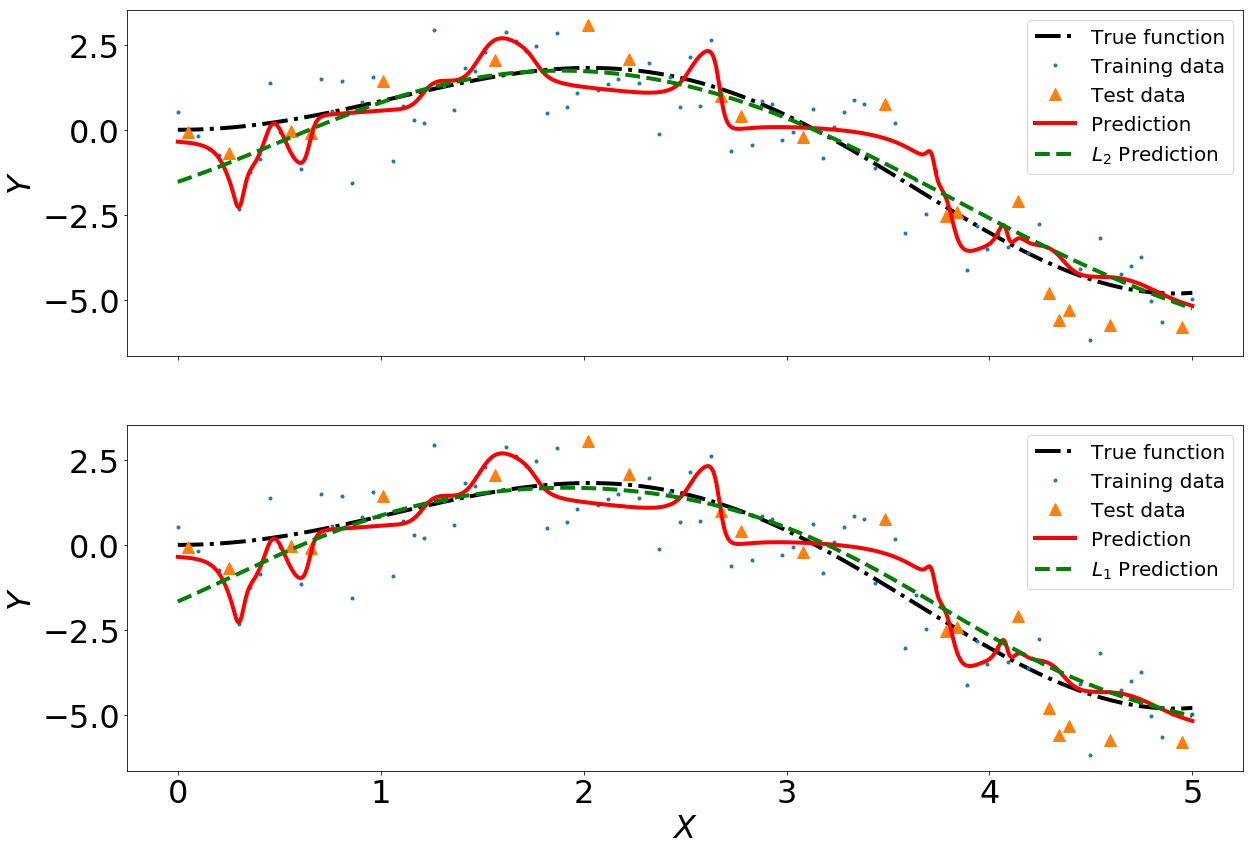

In [11]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred_L2 = model_L2.predict(X_range)

fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[0].plot(X_train, Y_train, '.', label='Training data')
ax[0].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[0].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[0].plot(X_range, y_pred_L2, lw=4, ls='--', color='g', label=r'$L_{2}$ Prediction')

ax[0].set_ylabel(r'$Y$', fontsize=32)
ax[0].tick_params(labelsize=32)

ax[0].legend(loc=1, fontsize=20)



y_pred_L1 = model_L1.predict(X_range)

ax[1].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[1].plot(X_train, Y_train, '.', label='Training data')
ax[1].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[1].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[1].plot(X_range, y_pred_L1, lw=4, ls='--', color='g', label=r'$L_{1}$ Prediction')

ax[1].set_xlabel(r'$X$', fontsize=32)
ax[1].set_ylabel(r'$Y$', fontsize=32)
ax[1].tick_params(labelsize=32)

ax[1].legend(loc=1, fontsize=20)

plt.show()

# Early Stopping
The results without any regularization do not look right.  $L_{2}$ and $L_{1}$ regularizaton helped somewhat, but the results still aren't convincing.

We can gain some more insight by plotting the loss functions from the training and validation set.  Let's use a `log-log` scale to enhance any discrepancies between the two curves.

First, a reminder.

Remember that the `fit` method can store the history of the model.  For the unregularized model we stored all the history in the name `no_reg`.  Let's see what attributes are in that object.

In [12]:
dir(no_reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

There is a lot of stuff; most of it we're not interested in.  However, at the very end of the list, we see some useful keys.  Let's access some of them.

In [13]:
type(no_reg.history)

dict

Looks like `history` is a dictionary.  Let's take a look at it's keys.

In [14]:
no_reg.history.keys()

dict_keys(['val_loss', 'loss'])

Very cool.  There is a `validation` and `training` loss.  

That's the one we'll want to use right now, but we can look at the other attributes too just to get a feel.

In [15]:
type(no_reg.validation_data)

list

In [16]:
type(no_reg.params)

dict

In [17]:
no_reg.params.keys()

dict_keys(['batch_size', 'epochs', 'steps', 'samples', 'verbose', 'do_validation', 'metrics'])

In [18]:
no_reg.params['batch_size']

64

Okay, that was fun and informative.  But what we're really after is the loss data as a function of epoch number.  Here we go.

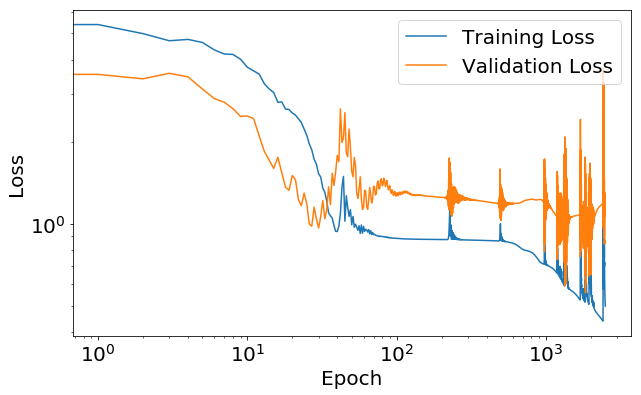

In [19]:
L = no_reg.history['loss']
L_val = no_reg.history['val_loss']

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(L, label='Training Loss')
ax.plot(L_val, label='Validation Loss')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow.  That is striking.

We used $2500$ epochs, but the validation loss begins to rise at around $50$ epochs and becomes larger than the training loss at around $70$ epochs.  After that, we're basically overfitting.

Notice that the training loss keeps decreasing.  We're fitting the training data better and better all the time.  The validation loss is getting larger and larger meaning that we're losing generalizability.

We can use this new information to our advantage!

## Exercise

### Part 1
Train a network without any penalization, but this time stop after $20$ epochs.

### Part 2
Train a network without any penalization, but this time stop at the "optimal" number of epochs (based on the crossing of the loss curves).

**Deliverables**
* Plot the following on a single figure:
  - The true solution
  - The model prediction without any regularization (after $2500$ epochs)
  - The model prediction without any regularization using $20$ epochs
  - The model prediction without any regularization using the optimal number of epochs
* You may also want to include the training and validation data on the same plot.  Be careful that the plot doesn't become too cluttered.

### Solution

#### $20$ epochs

In [20]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='tanh'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_20 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

X_range = np.linspace(0.0, 5, 1000)
y_pred_20 = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 0s 6ms/step - loss: 5.0855 - val_loss: 3.7304
Epoch 2/20
64/64 [==============================] - 0s 64us/step - loss: 5.2754 - val_loss: 3.3125
Epoch 3/20
64/64 [==============================] - 0s 46us/step - loss: 4.6643 - val_loss: 3.4966
Epoch 4/20
64/64 [==============================] - 0s 44us/step - loss: 4.6479 - val_loss: 3.4765
Epoch 5/20
64/64 [==============================] - 0s 44us/step - loss: 4.5738 - val_loss: 3.0249
Epoch 6/20
64/64 [==============================] - 0s 44us/step - loss: 4.1849 - val_loss: 2.7064
Epoch 7/20
64/64 [==============================] - 0s 43us/step - loss: 3.9910 - val_loss: 2.5814
Epoch 8/20
64/64 [==============================] - 0s 42us/step - loss: 3.9339 - val_loss: 2.3257
Epoch 9/20
64/64 [==============================] - 0s 47us/step - loss: 3.6040 - val_loss: 2.1924
Epoch 10/20
64/64 [==============================] - 0s 40us/step 

#### "Optimal" epochs
This probably isn't the optimal value.  But eye-balling the loss curves, I'm guess that $65$ epochs is the best.

In [21]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='tanh'))
    
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_opt = model.fit(X_train, Y_train, epochs=65, batch_size=64, validation_split=0.2)

y_pred_opt = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/65
64/64 [==============================] - 1s 8ms/step - loss: 5.4962 - val_loss: 3.9983
Epoch 2/65
64/64 [==============================] - 0s 50us/step - loss: 5.5739 - val_loss: 3.6931
Epoch 3/65
64/64 [==============================] - 0s 50us/step - loss: 5.1867 - val_loss: 3.5401
Epoch 4/65
64/64 [==============================] - 0s 44us/step - loss: 4.8760 - val_loss: 3.7119
Epoch 5/65
64/64 [==============================] - 0s 45us/step - loss: 4.9351 - val_loss: 3.6816
Epoch 6/65
64/64 [==============================] - 0s 44us/step - loss: 4.8768 - val_loss: 3.3864
Epoch 7/65
64/64 [==============================] - 0s 46us/step - loss: 4.6204 - val_loss: 3.1038
Epoch 8/65
64/64 [==============================] - 0s 57us/step - loss: 4.4208 - val_loss: 2.9897
Epoch 9/65
64/64 [==============================] - 0s 49us/step - loss: 4.3901 - val_loss: 2.8837
Epoch 10/65
64/64 [==============================] - 0s 45us/step 

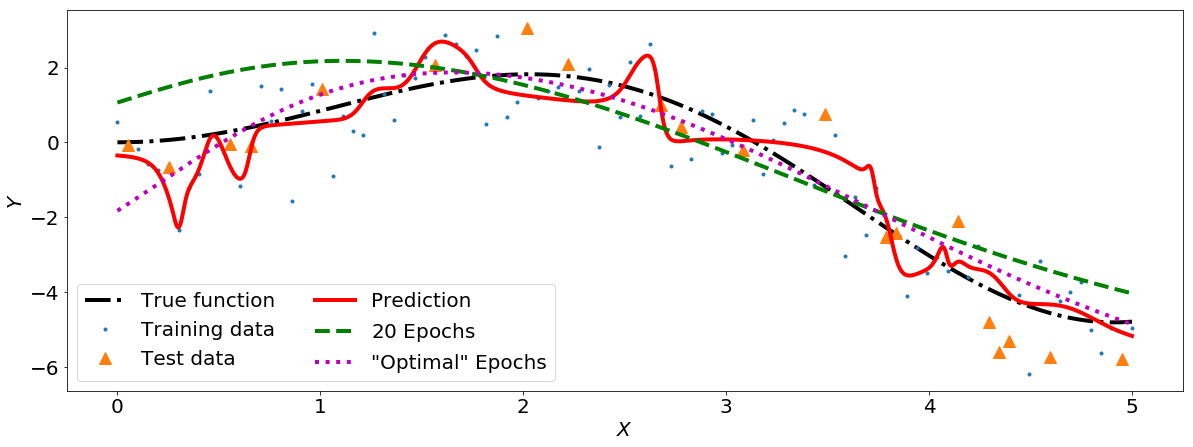

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_20, lw=4, ls='--', color='g', label=r'$20$ Epochs')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

Let's try to do things more systematically.

How do you think early stopping should be implemented?

To do early stopping in `Keras`, you specify the `EarlyStopping` [*callback*](https://keras.io/callbacks/).  From the documentation:
> A callback is a set of functions to be applied at given stages of the training procedure.

Callbacks can be used to view internal states and statistics of the model during training.

Right now, we'll use one to monitor the validation loss function.  When the validation loss starts to go up, the training process will stop.

#### Basic Syntax
To specify a callback, you just pass a `callbacks` list into the model `fit()` method, like this:
```python
from keras.callbacks import EarlyStopping

model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
```

## Exercise
Fit the model using the early stopping technique.  Try different values for `patience` to see which one gives you the lowest validation loss.

How many epochs are needed?

### Solution

In [23]:
from keras.callbacks import EarlyStopping

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='tanh'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_ES = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 7ms/step - loss: 5.5494 - val_loss: 3.8911
Epoch 2/2500
64/64 [==============================] - 0s 52us/step - loss: 5.4261 - val_loss: 3.6328
Epoch 3/2500
64/64 [==============================] - 0s 47us/step - loss: 5.1053 - val_loss: 3.4413
Epoch 4/2500
64/64 [==============================] - 0s 44us/step - loss: 4.7548 - val_loss: 3.5850
Epoch 5/2500
64/64 [==============================] - 0s 43us/step - loss: 4.7682 - val_loss: 3.5314
Epoch 6/2500
64/64 [==============================] - 0s 39us/step - loss: 4.6819 - val_loss: 3.2046
Epoch 7/2500
64/64 [==============================] - 0s 63us/step - loss: 4.3994 - val_loss: 2.9303
Epoch 8/2500
64/64 [==============================] - 0s 58us/step - loss: 4.2180 - val_loss: 2.8258
Epoch 9/2500
64/64 [==============================] - 0s 47us/step - loss: 4.1910 - val_loss: 2.6773
Epoch 10/2500
64/64 [===========================

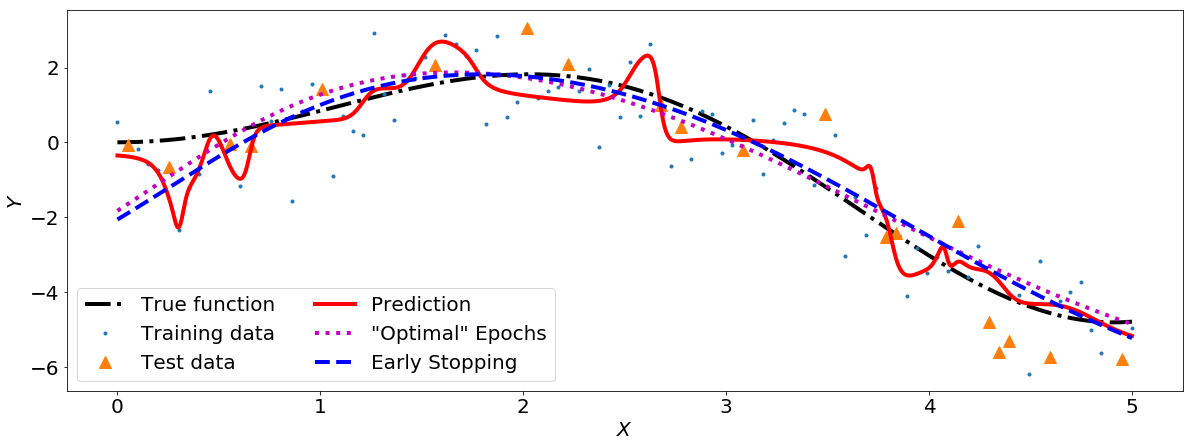

In [24]:
y_pred_ES = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(20,7))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')
ax.plot(X_range, y_pred_ES, lw=4, ls='--', color='b', label=r'Early Stopping')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

The solution should looks pretty good.  Of course, we had to play with the `patience` parameter.

# Dropout
The basic idea behind the dropout technique is to randomly remove (i.e drop) at unit from the network including all of its connections.  Why would we want to do such a thing?  Because we want to avoid overfitting.  An intuitive way of seeing this is that by randomly dropping units at each iteration, we are actually training an ensemble of models.  This ensemble may be more robust to different scenarios than a single model.

One usually needs to figure out how many units to drop in each layer.  Of course, this introduces a new hyperparameter to tune.  However, at least empirically, it appears that choosing a dropout rate of $0.5$ in the hidden layers and $0.8$ in the input layers works well.  Note that here the term "dropout rate" means "the probability of retention of each node in the layer".

Dropout usually works best on large networks.  We will use it on our small lab network today just to understand some of the mechanics.

The original paper on dropout has some nice explanations of the technique and also some really nice practical advice on using the technique:  [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

In [25]:
from keras.constraints import maxnorm

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='tanh'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='tanh', kernel_constraint=maxnorm(3)))
    model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_dropout = model.fit(X_train, Y_train, epochs=250, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/250
64/64 [==============================] - 1s 10ms/step - loss: 6.8348 - val_loss: 4.2583
Epoch 2/250
64/64 [==============================] - 0s 82us/step - loss: 6.3382 - val_loss: 4.0424
Epoch 3/250
64/64 [==============================] - 0s 65us/step - loss: 5.1803 - val_loss: 3.8823
Epoch 4/250
64/64 [==============================] - 0s 63us/step - loss: 6.0089 - val_loss: 3.7248
Epoch 5/250
64/64 [==============================] - 0s 63us/step - loss: 6.1128 - val_loss: 3.6264
Epoch 6/250
64/64 [==============================] - 0s 59us/step - loss: 5.3760 - val_loss: 3.6074
Epoch 7/250
64/64 [==============================] - 0s 78us/step - loss: 6.2461 - val_loss: 3.6358
Epoch 8/250
64/64 [==============================] - 0s 61us/step - loss: 5.5996 - val_loss: 3.6777
Epoch 9/250
64/64 [==============================] - 0s 63us/step - loss: 6.3042 - val_loss: 3.7110
Epoch 10/250
64/64 [==============================] - 0s

Epoch 82/250
64/64 [==============================] - 0s 77us/step - loss: 4.9806 - val_loss: 1.8826
Epoch 83/250
64/64 [==============================] - 0s 73us/step - loss: 4.8225 - val_loss: 1.8491
Epoch 84/250
64/64 [==============================] - 0s 94us/step - loss: 5.0046 - val_loss: 1.8193
Epoch 85/250
64/64 [==============================] - 0s 107us/step - loss: 4.2867 - val_loss: 1.7906
Epoch 86/250
64/64 [==============================] - 0s 96us/step - loss: 4.3858 - val_loss: 1.7680
Epoch 87/250
64/64 [==============================] - 0s 75us/step - loss: 4.8257 - val_loss: 1.7466
Epoch 88/250
64/64 [==============================] - 0s 86us/step - loss: 4.8008 - val_loss: 1.7348
Epoch 89/250
64/64 [==============================] - 0s 74us/step - loss: 4.3089 - val_loss: 1.7347
Epoch 90/250
64/64 [==============================] - 0s 98us/step - loss: 5.1818 - val_loss: 1.7566
Epoch 91/250
64/64 [==============================] - 0s 78us/step - loss: 5.1126 - val_lo

Epoch 163/250
64/64 [==============================] - 0s 61us/step - loss: 2.6444 - val_loss: 0.8143
Epoch 164/250
64/64 [==============================] - 0s 60us/step - loss: 2.5706 - val_loss: 0.8121
Epoch 165/250
64/64 [==============================] - 0s 54us/step - loss: 3.0355 - val_loss: 0.8637
Epoch 166/250
64/64 [==============================] - 0s 62us/step - loss: 2.6638 - val_loss: 0.8584
Epoch 167/250
64/64 [==============================] - 0s 54us/step - loss: 2.8099 - val_loss: 0.8760
Epoch 168/250
64/64 [==============================] - 0s 64us/step - loss: 2.5902 - val_loss: 0.7929
Epoch 169/250
64/64 [==============================] - 0s 79us/step - loss: 4.1594 - val_loss: 0.7588
Epoch 170/250
64/64 [==============================] - 0s 58us/step - loss: 2.8604 - val_loss: 0.7640
Epoch 171/250
64/64 [==============================] - 0s 65us/step - loss: 3.0813 - val_loss: 0.7863
Epoch 172/250
64/64 [==============================] - 0s 66us/step - loss: 3.6905

Epoch 244/250
64/64 [==============================] - 0s 92us/step - loss: 2.3124 - val_loss: 1.7390
Epoch 245/250
64/64 [==============================] - 0s 66us/step - loss: 1.9690 - val_loss: 1.0909
Epoch 246/250
64/64 [==============================] - 0s 61us/step - loss: 1.9797 - val_loss: 1.2816
Epoch 247/250
64/64 [==============================] - 0s 72us/step - loss: 2.5909 - val_loss: 1.2913
Epoch 248/250
64/64 [==============================] - 0s 56us/step - loss: 1.5926 - val_loss: 1.0531
Epoch 249/250
64/64 [==============================] - 0s 67us/step - loss: 2.0396 - val_loss: 1.1518
Epoch 250/250
64/64 [==============================] - 0s 67us/step - loss: 1.6080 - val_loss: 1.6695


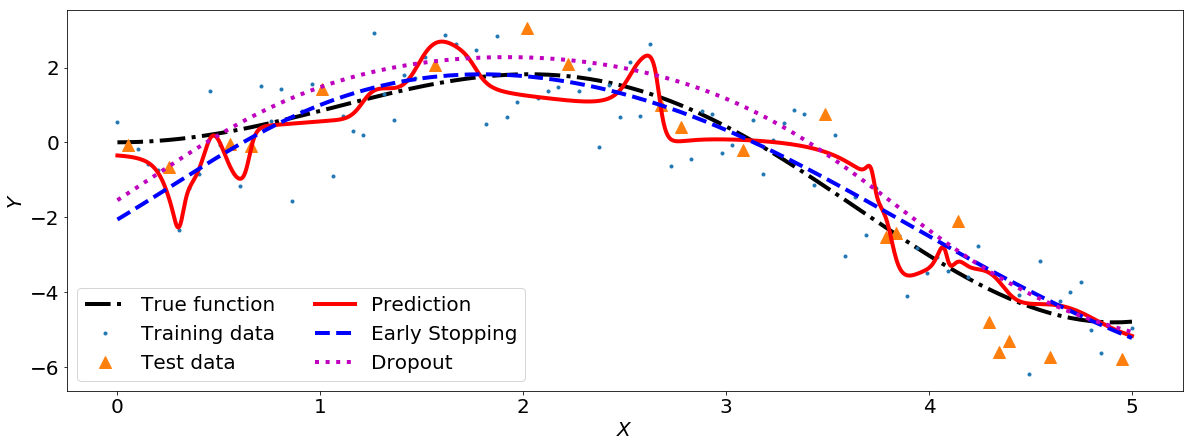

In [26]:
y_pred_DO = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(20,7))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_ES, lw=4, ls='--', color='b', label=r'Early Stopping')
ax.plot(X_range, y_pred_DO, lw=4, ls=':', color='m', label=r'Dropout')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()